## DV Assignment 2

In [1]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.cm as cm
from matplotlib.colors import Normalize

### 1. Load and Explore the data

In [2]:
# Load the full dataset
df = pd.read_csv('cardio_good_fitness.csv')

In [3]:
# Create a copy of the DataFrame
df_new = df.copy()

In [4]:
# Show overview of the dataset
df_new.head()

Product Branch Age  Gender Education MaritalStatus Usage Fitness Income  \
0   TM195   West  18    Male        14        Single   NaN       4  29562   
1   TM195   East  19    Male        15        Single     2       3  31836   
2   TM195   West  19  Female        14             P     4       3  30699   
3   TM195  South  na      na        na            na    na      na     na   
4   TM195   West  19    Male        12             S   NaN       3  32973   

  Miles  
0   112  
1    75  
2    66  
3    na  
4    85

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
Product          183 non-null object
Branch           183 non-null object
Age              180 non-null object
Gender           183 non-null object
Education        183 non-null object
MaritalStatus    183 non-null object
Usage            175 non-null object
Fitness          183 non-null object
Income           183 non-null object
Miles            183 non-null object
dtypes: object(10)
memory usage: 14.4+ KB


In [6]:
print(df_new.describe())

       Product Branch  Age Gender Education MaritalStatus Usage Fitness  \
count      183    183  180    183       183           183   175     183   
unique       3      4   32      3         9             5     7       6   
top      TM195  South   25   Male        16     Partnered     3       3   
freq        81     50   25    104        85           102    61      97   

       Income Miles  
count     183   183  
unique     63    38  
top     45480    85  
freq       14    27  


### 2. Cleanse and Transform the data

### 2.1 Identifying Missing Values

In [7]:
#identifying NULL values of each column
df_new.isnull().sum()

Product          0
Branch           0
Age              3
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
# Check for null values in each column
df_new.isnull().any()

Product          False
Branch           False
Age               True
Gender           False
Education        False
MaritalStatus    False
Usage             True
Fitness          False
Income           False
Miles            False
dtype: bool

In [9]:
df_new['Age'].describe()

count     180
unique     32
top        25
freq       25
Name: Age, dtype: object

In [10]:
# Check the number of null values in a specific column
df_new['Age'].isnull().values.sum()

3

In [11]:
df_new['Usage'].describe()

count     175
unique      7
top         3
freq       61
Name: Usage, dtype: object

In [12]:
# Check the number of null values in a specific column
df_new['Usage'].isnull().values.sum()

8

In [13]:
df_new[df_new == 'na'].count()

Product          0
Branch           0
Age              6
Gender           3
Education        3
MaritalStatus    3
Usage            3
Fitness          3
Income           3
Miles            3
dtype: int64

### 2.2 Replacing Missing Values

#### 1. MaritalStatus

In [14]:
df_new['MaritalStatus'].unique()

array(['Single', 'P', 'na', 'S', 'Partnered'], dtype=object)

In [15]:
df_new['MaritalStatus'].replace('na',np.nan,inplace = True)

In [16]:
df_new['MaritalStatus'].mode()

0    Partnered
dtype: object

In [17]:
df_new['MaritalStatus'].replace(np.nan, 'Partnered', inplace = True)

In [18]:
df_new['MaritalStatus'] = df_new['MaritalStatus'].astype(object)

In [19]:
print("Number of null values: "+str(df_new['MaritalStatus'].isnull().values.sum() + df_new['MaritalStatus'][df_new['MaritalStatus']=='na'].count()))

Number of null values: 0


#### 2. Income

In [20]:
df_new['Income'].unique()

array(['29562', '31836', '30699', 'na', '32973', '35247', '37521',
       '36384', '38658', '40932', '34110', '39795', '42069', '44343',
       '45480', '46617', '48891', '53439', '43206', '52302', '51165',
       '50028', '54576', '68220', '55713', '60261', '67083', '56850',
       '59124', '61398', '57987', '64809', '47754', '65220', '62535',
       '48658', '54781', '48556', '58516', '53536', '61006', '57271',
       '52291', '49801', '62251', '64741', '70966', '75946', '74701',
       '69721', '83416', '88396', '90886', '92131', '77191', '52290',
       '85906', '103336', '99601', '89641', '95866', '104581', '95508'],
      dtype=object)

In [21]:
df_new['Income'].replace('na',np.nan,inplace = True)
df_new['Income'] = df_new['Income'].astype(float)

In [22]:
df_new['Income'].median()

50596.5

In [23]:
df_new['Income'].replace(np.nan, 50596.5, inplace = True)

In [24]:
print("Number of null values: "+str(df_new['Income'].isnull().values.sum() + df_new['Income'][df_new['Income']=='na'].count()))

Number of null values: 0


C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



#### 3. Gender

In [25]:
df_new['Gender'].unique()

array(['Male', 'Female', 'na'], dtype=object)

In [26]:
df_new['Gender'].replace('na',np.nan,inplace = True)

In [27]:
df_new['Gender'].mode()

0    Male
dtype: object

In [28]:
df_new['Gender'].replace(np.nan, 'Male', inplace = True)

In [29]:
df_new['Gender'] = df_new['Gender'].astype(object)

In [30]:
print("Number of null values: "+str(df_new['Gender'].isnull().values.sum() + df_new['Gender'][df_new['Gender']=='na'].count()))

Number of null values: 0


#### 4. Age

In [31]:
df_new['Age'].replace('na',np.nan,inplace = True)

In [32]:
df_new['Age'].median()

26.0

In [33]:
df_new['Age'].replace(np.nan, 26, inplace = True)

In [34]:
df_new['Age'] = df_new['Age'].astype(int)

In [35]:
print("Number of null values: "+str(df_new['Age'].isnull().values.sum() + df_new['Age'][df_new['Age']=='na'].count()))

Number of null values: 0


#### 5. Education

In [36]:
df_new['Education'].unique()

array(['14', '15', 'na', '12', '13', '16', '18', '20', '21'], dtype=object)

In [37]:
df_new['Education'].replace('na',np.nan,inplace = True)

In [38]:
df_new['Education'].mode()

0    16
dtype: object

In [39]:
df_new['Education'].replace(np.nan, '16', inplace = True)

In [40]:
df_new['Education'] = df_new['Education'].astype(int)

In [41]:
# Check the number of null values in a specific column
print("Number of null values: "+str(df_new['Education'].isnull().values.sum()))

Number of null values: 0


In [42]:
print("Number of null values: "+str(df_new['Education'].isnull().values.sum() + df_new['Education'][df_new['Education']=='na'].count()))

Number of null values: 0


#### 6. Usage

In [43]:
df_new['Usage'].replace('na',np.nan,inplace = True)

In [44]:
df_new['Usage'].mode()

0    3
dtype: object

In [45]:
df_new['Usage'].replace(np.nan, '3', inplace = True)

In [46]:
df_new['Usage'] = df_new['Usage'].astype(int)

In [47]:
print("Number of null values: "+str(df_new['Usage'].isnull().values.sum() + df_new['Usage'][df_new['Usage']=='na'].count()))

Number of null values: 0


#### 7.  Fitness

In [48]:
df_new['Fitness'].unique()

array(['4', '3', 'na', '2', '1', '5'], dtype=object)

In [49]:
df_new['Fitness'].replace('na',np.nan,inplace = True)

In [50]:
df_new['Fitness'].mode()

0    3
dtype: object

In [51]:
df_new['Fitness'].replace(np.nan, '3', inplace = True)

In [52]:
df_new['Fitness'] = df_new['Fitness'].astype(int)

In [53]:
# Check the number of null values in a specific column
print("Number of null values: "+str(df_new['Fitness'].isnull().values.sum()))

Number of null values: 0


#### 8. Miles

In [54]:
df_new['Miles'].unique()

array(['112', '75', '66', 'na', '85', '47', '141', '103', '94', '113',
       '38', '188', '56', '132', '169', '64', '53', '106', '95', '212',
       '42', '127', '74', '170', '21', '120', '200', '140', '100', '80',
       '160', '180', '240', '150', '300', '280', '260', '360'],
      dtype=object)

In [55]:
df_new['Miles'].replace('na',np.nan,inplace = True)

In [56]:
df_new['Miles'].median()

94.0

In [57]:
df_new['Miles'].replace(np.nan, '94', inplace = True)

In [58]:
df_new['Miles'] = df_new['Miles'].astype(int)

In [59]:
print("Number of null values: "+str(df_new['Miles'].isnull().values.sum() + df_new['Miles'][df_new['Miles']=='na'].count()))

Number of null values: 0


### 2.3 Dropping Irrelevant Columns

All columns come in handy and so, I will not be removing any columns

### 2.4 Handling Irregular Values

#### 1. MaritalStatus

In [60]:
df_new['MaritalStatus'].unique()

array(['Single', 'P', 'Partnered', 'S'], dtype=object)

In [61]:
# Identify non "P" or "S" values in the Marital Status columns
error_list = [(i,type(df_new['MaritalStatus'].iloc[i]),df_new['MaritalStatus'].iloc[i]) for i in range(len(df_new['MaritalStatus'])) if not(str(df_new['MaritalStatus'].iloc[i]) == 'P') and not(str(df_new['MaritalStatus'].iloc[i]) == 'S')]

for each in error_list:
    print(each)
    
print('Number of records with no "P" or "S":', len(error_list))

(0, <class 'str'>, 'Single')
(1, <class 'str'>, 'Single')
(3, <class 'str'>, 'Partnered')
(5, <class 'str'>, 'Partnered')
(6, <class 'str'>, 'Partnered')
(7, <class 'str'>, 'Partnered')
(8, <class 'str'>, 'Single')
(9, <class 'str'>, 'Single')
(10, <class 'str'>, 'Partnered')
(11, <class 'str'>, 'Single')
(12, <class 'str'>, 'Partnered')
(13, <class 'str'>, 'Single')
(14, <class 'str'>, 'Single')
(15, <class 'str'>, 'Partnered')
(16, <class 'str'>, 'Partnered')
(17, <class 'str'>, 'Single')
(18, <class 'str'>, 'Partnered')
(19, <class 'str'>, 'Single')
(20, <class 'str'>, 'Partnered')
(21, <class 'str'>, 'Single')
(22, <class 'str'>, 'Single')
(23, <class 'str'>, 'Single')
(24, <class 'str'>, 'Partnered')
(25, <class 'str'>, 'Single')
(26, <class 'str'>, 'Partnered')
(27, <class 'str'>, 'Single')
(28, <class 'str'>, 'Partnered')
(29, <class 'str'>, 'Partnered')
(30, <class 'str'>, 'Partnered')
(31, <class 'str'>, 'Partnered')
(32, <class 'str'>, 'Single')
(33, <class 'str'>, 'Partnered

In [62]:
# Create dictionary to define replacement values
replacement_map = {'MaritalStatus':{'S':'Single','P':'Partnered'}}

In [63]:
# Replace values in DataFrame using dictionary map
df_new.replace(replacement_map, inplace=True)
df_new

Product Branch  Age  Gender  Education MaritalStatus  Usage  Fitness  \
0     TM195   West   18    Male         14        Single      3        4   
1     TM195   East   19    Male         15        Single      2        3   
2     TM195   West   19  Female         14     Partnered      4        3   
3     TM195  South   26    Male         16     Partnered      3        3   
4     TM195   West   19    Male         12        Single      3        3   
..      ...    ...  ...     ...        ...           ...    ...      ...   
178   TM798   East   40    Male         21        Single      6        5   
179   TM798   West   42    Male         18        Single      5        4   
180   TM798   East   45    Male         16        Single      5        5   
181   TM798  North   47    Male         18     Partnered      4        5   
182   TM798  South   48    Male         18     Partnered      4        5   

       Income  Miles  
0     29562.0    112  
1     31836.0     75  
2     30699.0     66  
3     50596.5     94  
4     32973.0     85  
..        ...    ...  
178   83416.0    200  
179   89641.0    200  
180   90886.0    160  
181  104581.0    120  
182   95508.0    180  

[183 rows x 10 columns]

In [64]:
df_new['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

### 2.5 Adding new columns

#### 1. ID

In [65]:
df_new.insert(0, 'ID', range(0, len(df_new)))

In [66]:
df_new

ID Product Branch  Age  Gender  Education MaritalStatus  Usage  Fitness  \
0      0   TM195   West   18    Male         14        Single      3        4   
1      1   TM195   East   19    Male         15        Single      2        3   
2      2   TM195   West   19  Female         14     Partnered      4        3   
3      3   TM195  South   26    Male         16     Partnered      3        3   
4      4   TM195   West   19    Male         12        Single      3        3   
..   ...     ...    ...  ...     ...        ...           ...    ...      ...   
178  178   TM798   East   40    Male         21        Single      6        5   
179  179   TM798   West   42    Male         18        Single      5        4   
180  180   TM798   East   45    Male         16        Single      5        5   
181  181   TM798  North   47    Male         18     Partnered      4        5   
182  182   TM798  South   48    Male         18     Partnered      4        5   

       Income  Miles  
0     29562.0    112  
1     31836.0     75  
2     30699.0     66  
3     50596.5     94  
4     32973.0     85  
..        ...    ...  
178   83416.0    200  
179   89641.0    200  
180   90886.0    160  
181  104581.0    120  
182   95508.0    180  

[183 rows x 11 columns]

#### 2. Generation

In [67]:
df_new.loc[(df_new['Age'] >= 6) & (df_new['Age'] <= 24), 'Generation'] = 'Gen Z'
df_new.loc[(df_new['Age'] >= 25) & (df_new['Age'] <= 40), 'Generation'] = 'Gen Y / Millenials'
df_new.loc[(df_new['Age'] >= 41) & (df_new['Age'] <= 56), 'Generation'] = 'Gen X'
df_new.loc[(df_new['Age'] >= 57) & (df_new['Age'] <= 75), 'Generation'] = 'Baby Boomers'
df_new.loc[(df_new['Age'] < 6) & (df_new['Age'] > 75), 'Generation'] = 'Others'

df_new['Generation']

0                   Gen Z
1                   Gen Z
2                   Gen Z
3      Gen Y / Millenials
4                   Gen Z
              ...        
178    Gen Y / Millenials
179                 Gen X
180                 Gen X
181                 Gen X
182                 Gen X
Name: Generation, Length: 183, dtype: object

In [68]:
df_new.groupby("Generation")['ID'].count()

Generation
Gen X                  12
Gen Y / Millenials    117
Gen Z                  54
Name: ID, dtype: int64

#### 3. Usage Level

In [69]:
df_new.loc[(df_new['Usage'] >= 2) & (df_new['Usage'] <= 3), 'Usage_Level'] = 'Low'
df_new.loc[(df_new['Usage'] >= 4) & (df_new['Usage'] <= 5), 'Usage_Level'] = 'Medium'
df_new.loc[(df_new['Usage'] >= 6) & (df_new['Usage'] <= 7), 'Usage_Level'] = 'High'

df_new['Usage_Level']

0         Low
1         Low
2      Medium
3         Low
4         Low
        ...  
178      High
179    Medium
180    Medium
181    Medium
182    Medium
Name: Usage_Level, Length: 183, dtype: object

In [70]:
df_new.groupby("Usage_Level")['ID'].count()

Usage_Level
High        9
Low       105
Medium     69
Name: ID, dtype: int64

### 3. Data Exploration on Numeric and Categorical Data <a id='part3' />

###### Numeric Data

In [71]:
# categorical data
df_num = df_new.select_dtypes(['int','float']).copy()
df_num.head()

ID  Age  Education  Usage  Fitness   Income  Miles
0   0   18         14      3        4  29562.0    112
1   1   19         15      2        3  31836.0     75
2   2   19         14      4        3  30699.0     66
3   3   26         16      3        3  50596.5     94
4   4   19         12      3        3  32973.0     85

In [72]:
df_num.describe()

ID         Age   Education       Usage     Fitness  \
count  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    91.000000   28.644809   15.579235    3.448087    3.306011   
std     52.971691    6.912289    1.604597    1.077382    0.951758   
min      0.000000   18.000000   12.000000    2.000000    1.000000   
25%     45.500000   24.000000   14.000000    3.000000    3.000000   
50%     91.000000   26.000000   16.000000    3.000000    3.000000   
75%    136.500000   33.000000   16.000000    4.000000    4.000000   
max    182.000000   50.000000   21.000000    7.000000    5.000000   

              Income       Miles  
count     183.000000  183.000000  
mean    53668.379781  103.043716  
std     16374.904224   51.447704  
min     29562.000000   21.000000  
25%     44343.000000   70.000000  
50%     50596.500000   94.000000  
75%     58251.500000  113.000000  
max    104581.000000  360.000000

In [73]:
df_num.nunique()

ID           183
Age           31
Education      8
Usage          6
Fitness        5
Income        63
Miles         37
dtype: int64

In [74]:
# Count the frequency of each category in each column
for i in df_num:
    print(i)
    print(df_num[i].value_counts())
    print('\n')

ID
182    1
67     1
65     1
64     1
63     1
      ..
119    1
118    1
117    1
116    1
0      1
Name: ID, Length: 183, dtype: int64


Age
25    25
26    21
23    18
24    12
28     9
33     8
35     8
38     7
30     7
27     7
22     7
21     7
31     6
34     6
40     5
20     5
32     4
19     4
37     2
48     2
45     2
47     2
50     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
18     1
Name: Age, dtype: int64


Education
16    88
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64


Usage
3    72
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64


Fitness
3    100
5     31
2     26
4     24
1      2
Name: Fitness, dtype: int64


Income
45480.0    14
52302.0     9
54576.0     8
53439.0     8
46617.0     8
           ..
74701.0     1
70966.0     1
95866.0     1
30699.0     1
48658.0     1
Name: Income, Length: 63, dtype: int64


Miles
85     27
95     12
94     11
66     10
75     10
47      9
106 

###### Categorical Data

In [75]:
# categorical data
df_cat = df_new.select_dtypes(['object']).copy()
df_cat.head()

Product Branch  Gender MaritalStatus          Generation Usage_Level
0   TM195   West    Male        Single               Gen Z         Low
1   TM195   East    Male        Single               Gen Z         Low
2   TM195   West  Female     Partnered               Gen Z      Medium
3   TM195  South    Male     Partnered  Gen Y / Millenials         Low
4   TM195   West    Male        Single               Gen Z         Low

In [76]:
df_cat.describe()

Product Branch Gender MaritalStatus          Generation Usage_Level
count      183    183    183           183                 183         183
unique       3      4      2             2                   3           3
top      TM195  South   Male     Partnered  Gen Y / Millenials         Low
freq        81     50    107           110                 117         105

In [77]:
df_cat.nunique()

Product          3
Branch           4
Gender           2
MaritalStatus    2
Generation       3
Usage_Level      3
dtype: int64

In [78]:
# Count the frequency of each category in each column
for i in df_cat:
    print(i)
    print(df_cat[i].value_counts())
    print('\n')

Product
TM195    81
TM498    61
TM798    41
Name: Product, dtype: int64


Branch
South    50
West     48
East     45
North    40
Name: Branch, dtype: int64


Gender
Male      107
Female     76
Name: Gender, dtype: int64


MaritalStatus
Partnered    110
Single        73
Name: MaritalStatus, dtype: int64


Generation
Gen Y / Millenials    117
Gen Z                  54
Gen X                  12
Name: Generation, dtype: int64


Usage_Level
Low       105
Medium     69
High        9
Name: Usage_Level, dtype: int64




## 4. Data Visualisation

In [79]:
# Set theme
sns.set_style('darkgrid')
plt.style.use('seaborn-pastel')
#plt.style.use('ggplot')

### 4.1 Product

#### 1. What is the percentage breakdown of treadmills sold by product type?

Credits: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

Text(0.5, 1.0, 'Treadmills bought by Product Type')

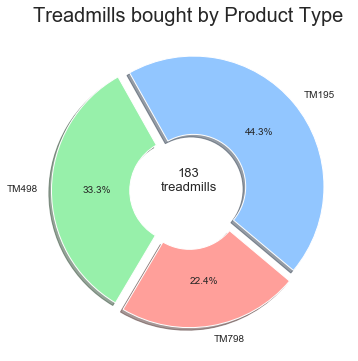

In [80]:
# Count number of stays based on a specific room type
frequency = df_new.groupby('Product')['ID'].count()

rt = frequency.index

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(frequency, labels=rt, autopct='%1.1f%%', wedgeprops=dict(width=0.6), pctdistance=0.65, explode = (0.05,0.05,0.05), startangle=-40, shadow=True)
ax.annotate('183\ntreadmills', xy=(0,0), fontsize=13, horizontalalignment='center')
ax.set_title("Treadmills bought by Product Type", fontsize=20)

#### 2. What is the characteristics of customers who purchased each product type?

Credits: https://plotly.com/python/figure-factory-subplots/

In [81]:
df_new.groupby(['Product', 'Branch'])['ID'].count()

Product  Branch
TM195    East      14
         North     18
         South     26
         West      23
TM498    East      17
         North     11
         South     17
         West      16
TM798    East      14
         North     11
         South      7
         West       9
Name: ID, dtype: int64

In [82]:
df_new.groupby(['Product'])['Usage'].mean()

Product
TM195    3.086420
TM498    3.065574
TM798    4.731707
Name: Usage, dtype: float64

In [83]:
df_new.groupby(['Product'])['Fitness'].mean()

Product
TM195    2.962963
TM498    2.901639
TM798    4.585366
Name: Fitness, dtype: float64

In [84]:
df_new.groupby(['Product'])['Miles'].mean()

Product
TM195     82.925926
TM498     88.032787
TM798    165.121951
Name: Miles, dtype: float64

In [85]:
df_new.groupby(['Product'])['ID'].count()

Product
TM195    81
TM498    61
TM798    41
Name: ID, dtype: int64

In [86]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as pyo
pyo.init_notebook_mode()

table_data = [['Product', 'Most Popular Branch', 'Usage/Week', 'Fitness', 'Miles','Treadmills Sold'],
              ['TM195', 'South', 3, '3/5', 83, 81],
              ['TM498', 'East & South', 3, '3/5', 88, 61],
              ['TM798', 'East', 5, '5/5', 165, 41]]

fig = ff.create_table(table_data, height_constant=60)

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': 'Treadmill Product Information'})

fig.show()

### 4.2 Branch

#### 1.Which branch is the most and least popular for purchasing all three treadmills?

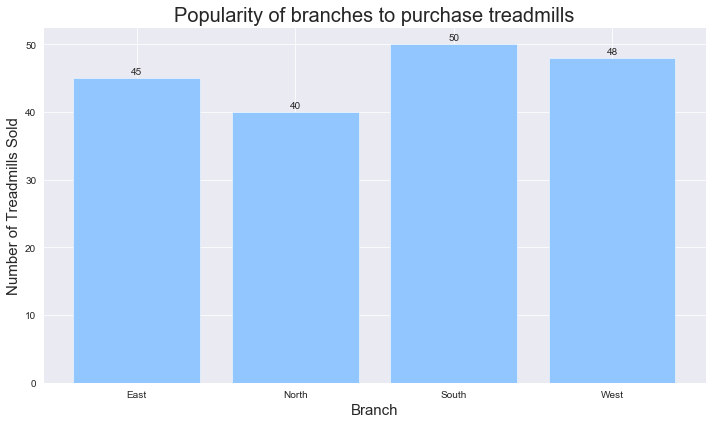

In [208]:
# Create a figure and subplot

fig, ax = plt.subplots(figsize=(10,6))
y_vals  = df_new.groupby('Branch')['Branch'].count()
x_vals = y_vals.index

# Set the label locations and width of the bars
x_pos = np.arange(len(x_vals))  

# Plot horizontal bar chart
bar1 = ax.bar(x_pos, y_vals, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_vals)
ax.set_xlabel('Branch', fontsize = 15)
ax.set_ylabel('Number of Treadmills Sold', fontsize = 15)
ax.set_title('Popularity of branches to purchase treadmills',fontsize = 20)

# Annotations
for each in bar1:
    height = each.get_height()
    ax.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')
    
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 2.Which branch sold most of each treadmill model?

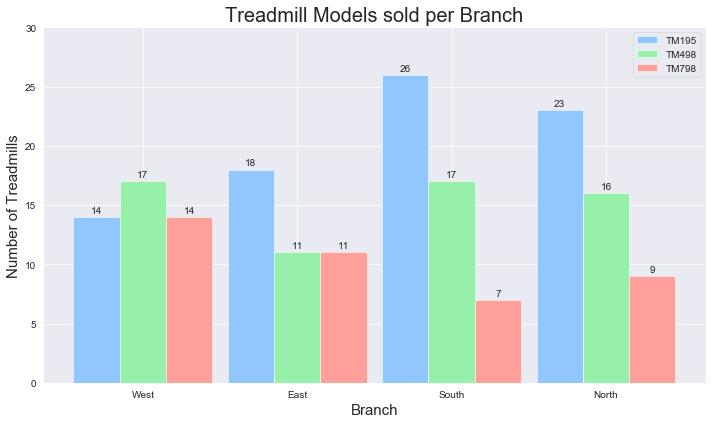

In [209]:
# Define x-axis and y-axis data values

x_labels = df_new['Branch'].unique()
product_TM195 = df_new[df_new['Product'] == 'TM195'].groupby(['Branch', 'Product'])['Product'].count()
product_TM498 = df_new[df_new['Product'] == 'TM498'].groupby(['Branch', 'Product'])['Product'].count()
product_TM798 = df_new[df_new['Product'] == 'TM798'].groupby(['Branch', 'Product'])['Product'].count()

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.30

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, product_TM195, width, label='TM195')
bar2 = ax.bar(x + width/2, product_TM498, width, label='TM498')
bar3 = ax.bar(x + 3*width/2, product_TM798, width, label='TM798')

# Customise the plot
ax.set_title('Treadmill Models sold per Branch', fontsize = 20)
ax.set_ylabel('Number of Treadmills', fontsize = 15)
ax.set_xlabel('Branch', fontsize = 15)
ax.set_xticks(x+0.15)
ax.set_xticklabels(x_labels)
ax.set_ylim(bottom = 0, top = 30)
ax.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 3.	What is the income distribution of customers in each branch? 

In [210]:
df_new['Income'].describe()

count       183.000000
mean      53668.379781
std       16374.904224
min       29562.000000
25%       44343.000000
50%       50596.500000
75%       58251.500000
max      104581.000000
Name: Income, dtype: float64

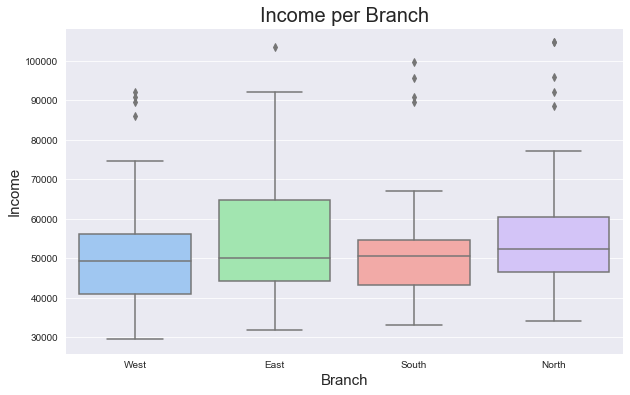

In [211]:
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Violin plot
sns.boxplot(x='Branch', y='Income', data=df_new)

#Set titles
ax.set_title('Income per Branch', fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Branch', fontsize = 15)

# Display the plot
plt.show()

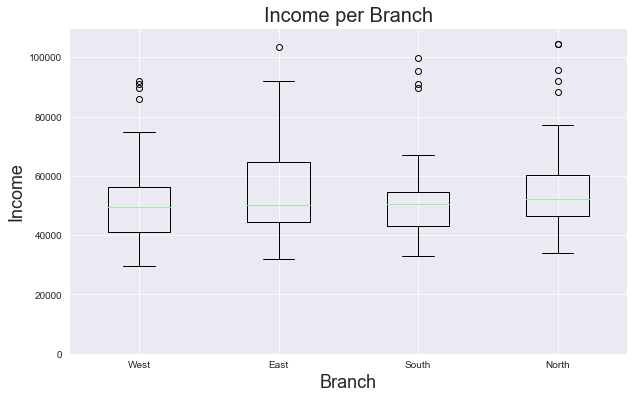

In [212]:
income_list = []
label_arr = df_new['Branch'].unique()
label_list = label_arr.tolist()

for i in label_list:
    temp = df_new[df_new["Branch"] == i]
    temp = temp.groupby("ID")["Income"].sum().tolist()
    income_list.append(temp)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Branch', fontsize=18)
ax.set_ylabel('Income', fontsize=18)
ax.set_title('Income per Branch', fontsize=20)
ax.set_ylim(0,110000)
ax.set_xticklabels(label_list)
ax.boxplot(income_list)

plt.show()

Credits: https://plotly.com/python/box-plots/

In [304]:
import plotly.express as px
fig = px.box(df_new, x="Branch", y="Income", title="Income per Branch")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### 4.3 Gender

#### 1. What is the breakdown of treadmills bought by males and females respectively? 

Text(0.5, 1.0, 'Treadmills bought by Gender')

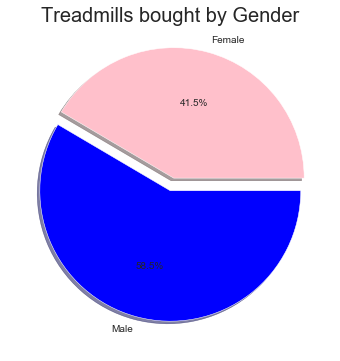

In [213]:
# Count number of stays based on a specific room type
frequency = df_new.groupby('Gender')['ID'].count()

rt = frequency.index

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(frequency, labels=rt, autopct='%1.1f%%', explode=(0.1,0), shadow=True, colors=['pink','blue'])
ax.set_title("Treadmills bought by Gender", fontsize=20)

#### 2.	Which treadmill model is most preferred by males and females respectively?

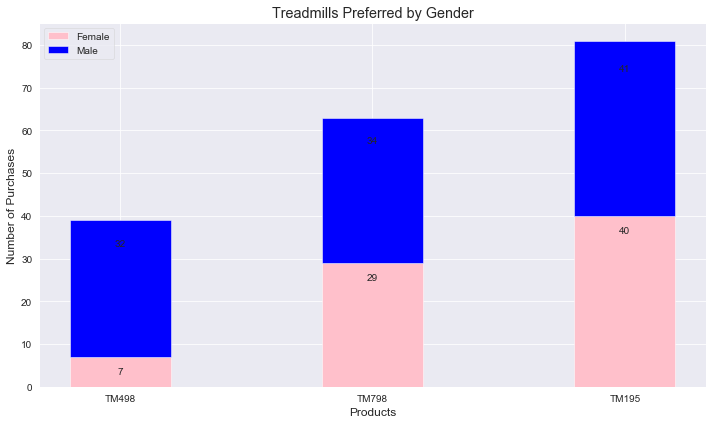

In [214]:
# Create a figure and subplot

fig, ax = plt.subplots(figsize=(10,6))
y_female = df_new[df_new['Gender'] == 'Female'].groupby('Product')['ID'].count().sort_values(ascending = True)
x_vals = y_female.index
y_male = df_new[df_new['Gender'] == 'Male'].groupby('Product')['ID'].count().sort_values(ascending = True)
x_vals = y_male.index

# Set the label locations and width of the bars
x_pos = np.arange(len(x_vals))  
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=6)

# Plot horizontal bar chart
bar1 = ax.bar(df_new['Product'].unique(), y_female, 0.4, label="Female", color='pink')
bar2 = ax.bar(df_new['Product'].unique(), y_male, 0.4, bottom=y_female, label='Male', color = 'blue')

ax.set_xticks(x_pos)
ax.set_xticklabels(x_vals)
ax.set_xlabel('Products')
ax.set_ylabel('Number of Purchases')
ax.set_title('Treadmills Preferred by Gender')
ax.legend()

# Annotations for Female bars
for each in bar1:
    height = each.get_height()
    ax.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, -15),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='center')
    
# Annotations for Male bars
x=0
y=0
for each in bar2:
    height = each.get_height()
    ax.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height + x),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')
    y = y + 1
    if(y == 1):
        x = x + 22
    if(y == 2):
        x = x + 10

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 3. Which gender uses the treadmill more often than the other?

In [215]:
y  = df_new[df_new['Gender'] == 'Female'].groupby('Usage')['ID'].count()
female_customers = y.tolist()
female_customers.append(0)
female_customers

[20, 33, 14, 7, 2, 0]

In [216]:
y  = df_new[df_new['Gender'] == 'Male'].groupby('Usage')['ID'].count()
male_customers = y.tolist()
male_customers

[13, 39, 38, 10, 5, 2]

In [217]:
df_new['Usage'].sort_values().unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

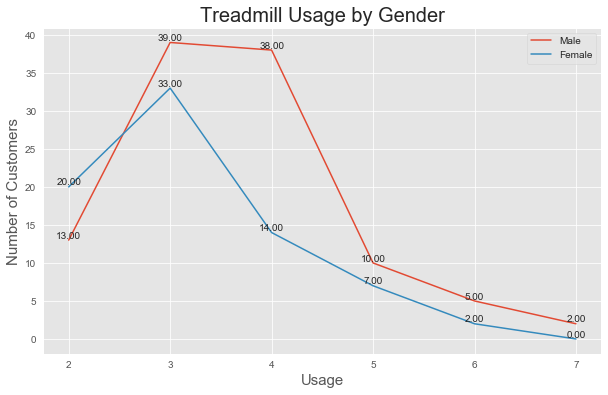

In [218]:
plt.style.use('ggplot')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Plot
sns.lineplot(x=df_new['Usage'].sort_values().unique(), y=male_customers, data=df_new, ax = ax,
            markers="o", label="Male")
sns.lineplot(x=df_new['Usage'].sort_values().unique(), y=female_customers, data=df_new, ax = ax,
            markers="^", label="Female")

#Set titles
ax.set_title('Treadmill Usage by Gender', fontsize = 20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Usage', fontsize = 15)
ax.legend(loc='upper left')

# Display Data Labels for Female 
for x, y in zip(df_new['Usage'].sort_values().unique(),female_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display Data Labels for Male 
for x, y in zip(df_new['Usage'].sort_values().unique(),male_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display the plot
ax.legend()
plt.show()

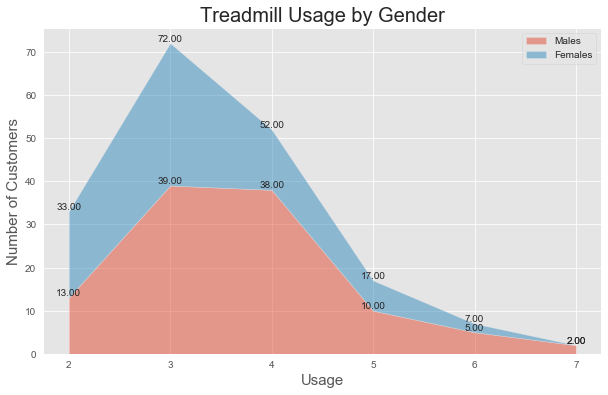

In [219]:
# Your x and y axis
fig, ax = plt.subplots(figsize=(10,6)) 
x=range(2,8)
y=[male_customers, female_customers]
 
# Basic stacked area chart.
ax = plt.stackplot(x,y, labels=['Males','Females'], alpha=0.5)
plt.legend(loc='upper right')

# Display Data Labels for Interest Paid Line Chart
for x, y in zip(x,male_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Display Data Labels for Principal Paid Line Chart
x=range(2,8)
new_female_customers = []
num = 0
val = 0
for i in female_customers:
    val = i + male_customers[num]
    new_female_customers.append(val)
    num = num + 1
        
        
for x, y in zip(x,new_female_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
#Set titles
plt.title('Treadmill Usage by Gender', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xlabel('Usage', fontsize = 15)

plt.show()

### 4.4 Age

#### 1. What is the age distribution of Cardio Good Fitness’ customers?

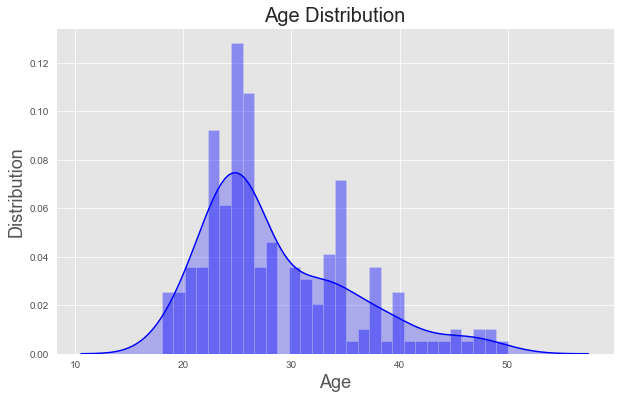

In [220]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,6))
 
# Plotting the distribution plot
sns.distplot(df_new['Age'].astype(int), bins=30, color='b', kde_kws={"shade": True}, ax=ax)

# Labels
ax.set_title('Age Distribution', fontsize = 20)
ax.set_ylabel('Distribution', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18)

# Display the plot
plt.show()

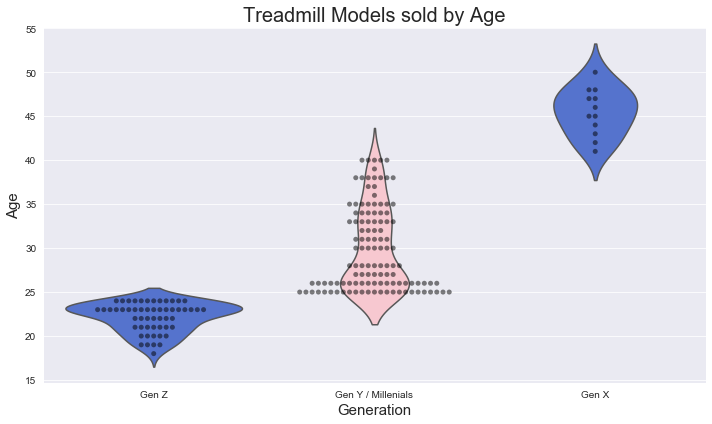

In [221]:
# Define x-axis and y-axis data values
plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')
gender_type_colors = ['#4169E1',  # Male
                    '#FFC0CB',  # Female
                   ]

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Violin plot with Gender color palette
ax = sns.violinplot(x='Generation', y='Age', data = df_new, inner = None,
               palette=gender_type_colors) # Set color palette)

# Overlay swarm plot on violin plot
sns.swarmplot(x='Generation', y='Age', data = df_new, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent

# Customise the plot
ax.set_title('Treadmill Models sold by Age', fontsize = 20)
ax.set_ylabel('Age', fontsize = 15)
ax.set_xlabel('Generation', fontsize = 15)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 2. Which age group purchased the most treadmills by model type? 

In [222]:
df_new.groupby("Generation")['ID'].count()

Generation
Gen X                  12
Gen Y / Millenials    117
Gen Z                  54
Name: ID, dtype: int64

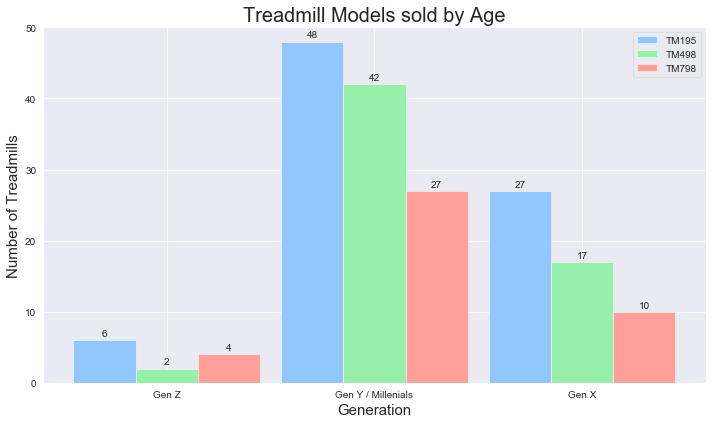

In [223]:
# Define x-axis and y-axis data values
plt.style.use('seaborn-pastel')
x_labels = df_new['Generation'].unique()
product_TM195 = df_new[df_new['Product'] == 'TM195'].groupby(['Generation', 'Product'])['Product'].count()
product_TM498 = df_new[df_new['Product'] == 'TM498'].groupby(['Generation', 'Product'])['Product'].count()
product_TM798 = df_new[df_new['Product'] == 'TM798'].groupby(['Generation', 'Product'])['Product'].count()

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.30

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, product_TM195, width, label='TM195')
bar2 = ax.bar(x + width/2, product_TM498, width, label='TM498')
bar3 = ax.bar(x + 3*width/2, product_TM798, width, label='TM798')

# Customise the plot
ax.set_title('Treadmill Models sold by Age', fontsize = 20)
ax.set_ylabel('Number of Treadmills', fontsize = 15)
ax.set_xlabel('Generation', fontsize = 15)
ax.set_xticks(x+0.15)
ax.set_xticklabels(x_labels)
ax.set_ylim(bottom = 0, top = 50)
ax.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 3. What is the age of customers based on gender? 

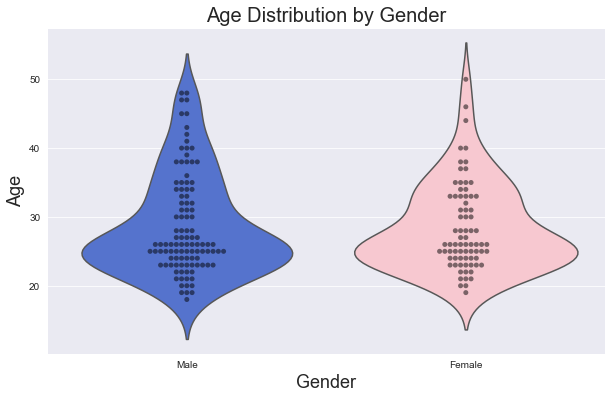

In [224]:
# List of colours to represent each Gender type
gender_type_colors = ['#4169E1',  # Male
                    '#FFC0CB',  # Female
                   ]
# Set figure size
plt.figure(figsize=(10,6))
 
# Violin plot with Gender color palette
ax = sns.violinplot(x='Gender', y='Age', data = df_new, inner = None,
               palette=gender_type_colors) # Set color palette)

# Overlay swarm plot on violin plot
sns.swarmplot(x='Gender', y='Age', data = df_new, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent

# Labels
ax.set_title('Age Distribution by Gender', fontsize = 20)
ax.set_ylabel('Age', fontsize = 18)
ax.set_xlabel('Gender', fontsize = 18)

# Display the plot
plt.show()

### 4.5 Education

#### 1.	What is the relation between the income and age for the years of education completed by Cardio Good Fitness’ customers?

Credits: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

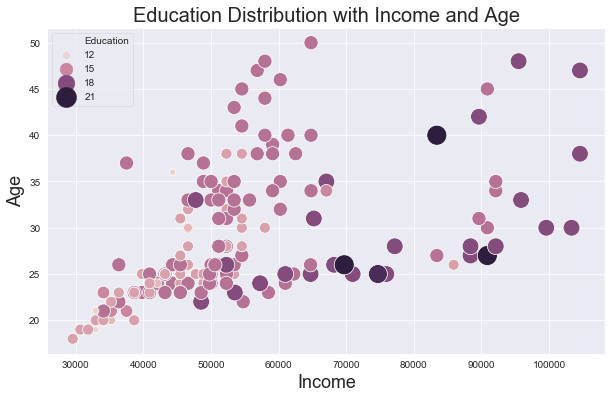

In [225]:
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot scatterplot
sns.scatterplot(data=df_new, x="Income", y="Age", hue="Education", sizes=(40, 400), size="Education")

# Labels
ax.set_title('Education Distribution with Income and Age', fontsize = 20)
ax.set_ylabel('Age', fontsize = 18)
ax.set_xlabel('Income', fontsize = 18)

# Display the plot
plt.show()

##### Another way of doing

Credits: https://plotly.com/python/ml-regression/

In [311]:
df = px.data.tips()
fig = px.scatter(
    df_new, x='Income', y='Age', color="Education", opacity=0.65, size="Education", title="Education Distribution with Income and Age"
)
fig.show()

#### 2. Which product sold better across customers from different years of education?

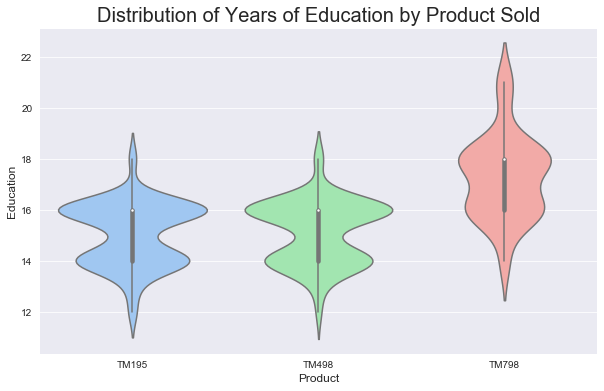

In [226]:
# Set figure size
plt.figure(figsize=(10,6))
 
# Violin plot with Pokemon color palette
sns.violinplot(x='Product', y='Education', data=df_new) # Set color palette)

# Set title with matplotlib
plt.title('Distribution of Years of Education by Product Sold', fontsize=20)

# Display the plot
plt.show()

#### Extra:

The pairplot() takes a broad view: it shows joint and marginal distributions for all pairwise relationships and for each variable respectively:

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



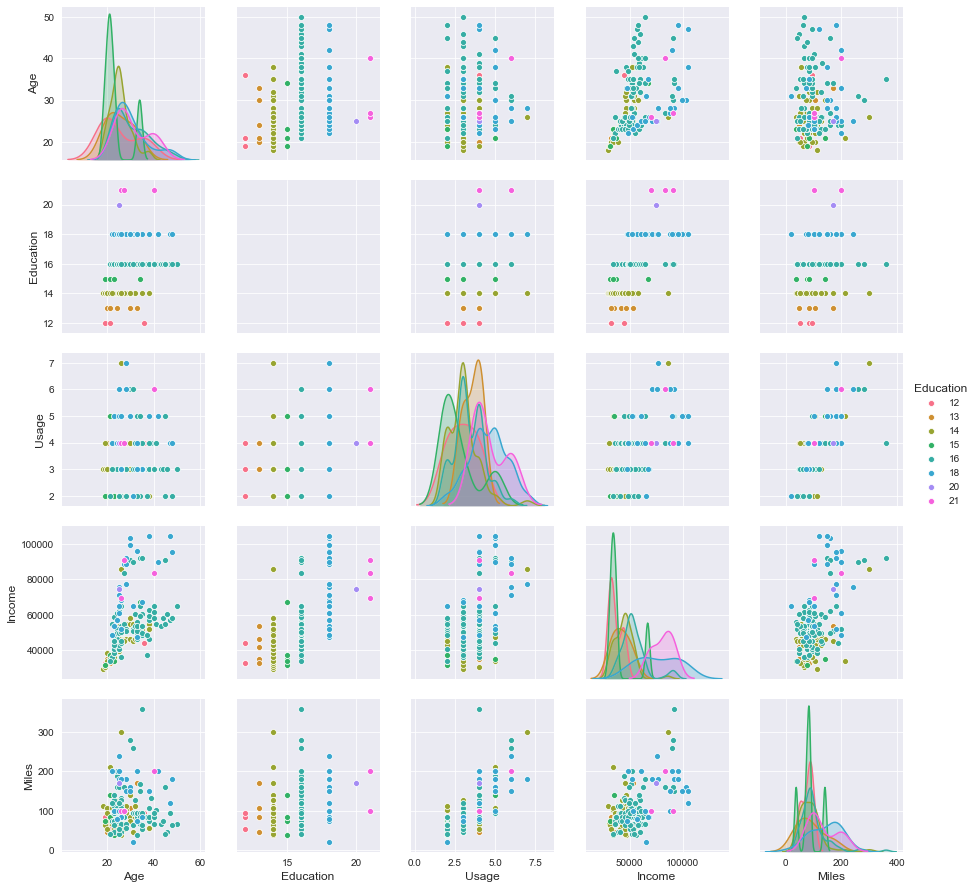

In [227]:
sns.pairplot(data=df_new[['Age','Education','Usage','Income','Miles']], hue="Education")

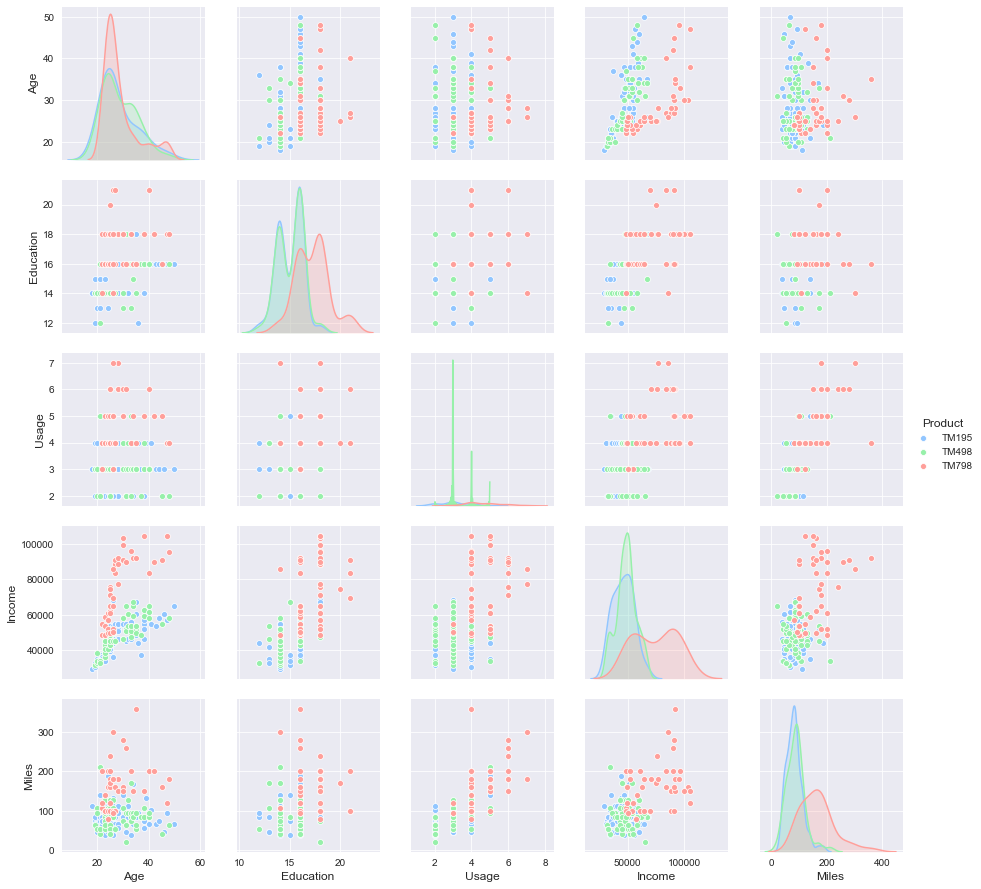

In [228]:
sns.pairplot(data=df_new[['Age','Education','Usage','Income','Product','Miles']], hue="Product")

Assuming that customers with < 10 years of education are still schooling

### 4.6 Marital Status

#### 1. What is the breakdown of customers who bought each treadmill product in terms of their marital status?

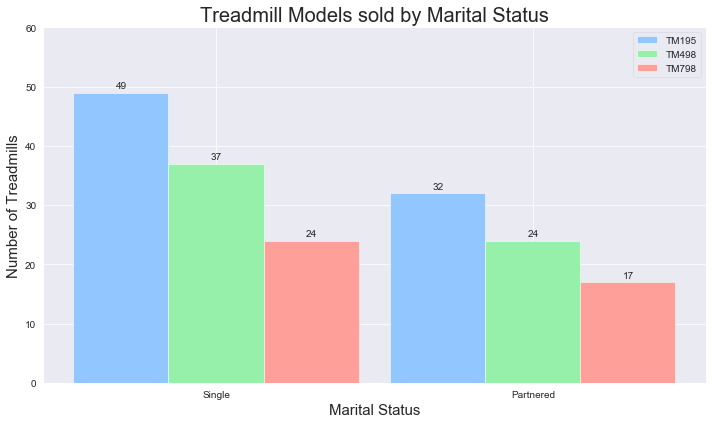

In [229]:
plt.style.use('seaborn-pastel')

# Define x-axis and y-axis data values
x_labels = df_new['MaritalStatus'][df_new['MaritalStatus'] != 'na'].unique()
product_TM195 = df_new[(df_new['Product'] == 'TM195') & (df_new['MaritalStatus'] != 'na')].groupby(['MaritalStatus', 'Product'])['Product'].count()
product_TM498 = df_new[(df_new['Product'] == 'TM498') & (df_new['MaritalStatus'] != 'na')].groupby(['MaritalStatus', 'Product'])['Product'].count()
product_TM798 = df_new[(df_new['Product'] == 'TM798') & (df_new['MaritalStatus'] != 'na')].groupby(['MaritalStatus', 'Product'])['Product'].count()

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.30

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, product_TM195, width, label='TM195')
bar2 = ax.bar(x + width/2, product_TM498, width, label='TM498')
bar3 = ax.bar(x + 3*width/2, product_TM798, width, label='TM798')

# Customise the plot
ax.set_title('Treadmill Models sold by Marital Status', fontsize = 20)
ax.set_ylabel('Number of Treadmills', fontsize = 15)
ax.set_xlabel('Marital Status', fontsize = 15)
ax.set_xticks(x+0.15)
ax.set_xticklabels(x_labels)
ax.set_ylim(bottom = 0, top = 60)
ax.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 2. What is the income distribution of customers by marital status?

Credits: https://seaborn.pydata.org/examples/grouped_boxplot.html

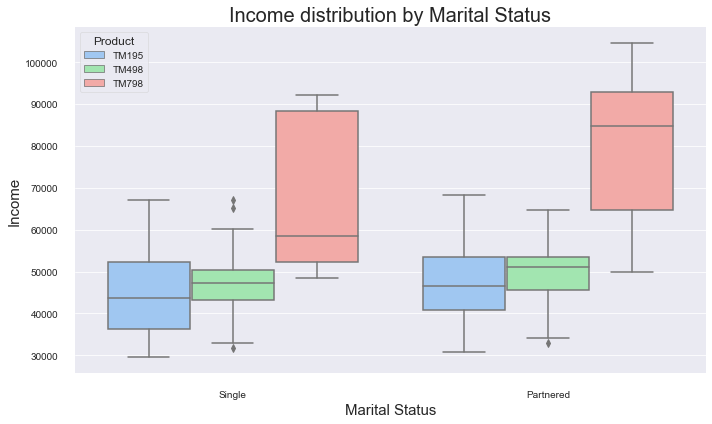

In [230]:
# Create a figure and subplot
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(10,6))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="MaritalStatus", y='Income',
            hue="Product",
            data=df_new)
sns.despine(offset=10, trim=True)

# Customise the plot
ax.set_title('Income distribution by Marital Status', fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Marital Status', fontsize = 15)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

##### Another way of doing

Credits: https://plotly.com/python/box-plots/

In [231]:
import plotly.express as px
fig = px.box(df_new, x="Gender", y="Income", color="Product", title="Income distribution by Marital Status")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### 4.7 Usage

#### 1.	What is the number of times all customers will use the treadmill each week?

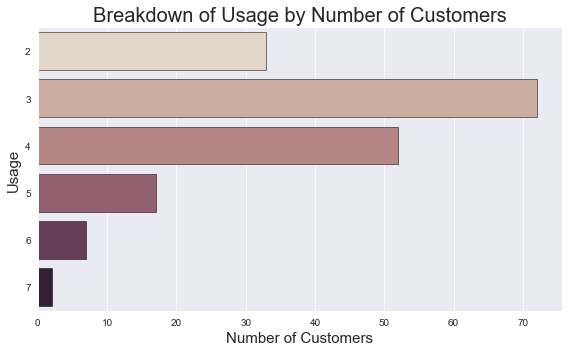

In [232]:
fig, ax = plt.subplots(figsize=(8,5))
sns.catplot(y="Usage", kind="count", palette="ch:.25", data=df_new, edgecolor='black', aspect = 2, orient = 'h', ax = ax)

# Customise the plot
ax.set_title('Breakdown of Usage by Number of Customers', fontsize = 20)
ax.set_ylabel('Usage', fontsize = 15)
ax.set_xlabel('Number of Customers', fontsize = 15)

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.close(2)
plt.close(3)
plt.show()

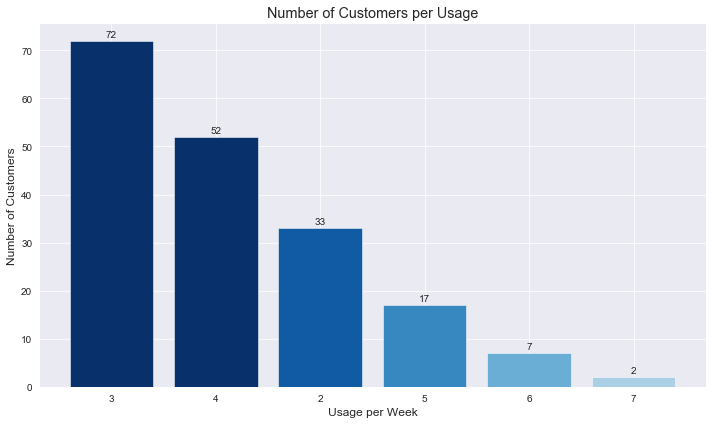

In [233]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
# Create a figure and subplot

fig, ax = plt.subplots(figsize=(10,6))
y_vals = df_new.groupby('Usage')['ID'].count().sort_values(ascending = False)
x_vals = y_vals.index

# Set the label locations and width of the bars
x_pos = np.arange(len(x_vals))  

# Get a color map
my_cmap = cm.get_cmap('Blues')
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=6)

# Plot horizontal bar chart
bar1 = ax.bar(x_pos, y_vals, align='center', color=my_cmap(my_norm(df_new['Usage'].sort_values(ascending = False).unique())))
ax.set_xticks(x_pos)
ax.set_xticklabels(x_vals)
ax.set_xlabel('Usage per Week')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers per Usage')

# Annotations
for each in bar1:
    height = each.get_height()
    ax.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')
    
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

#### 2.	Which treadmill model is the best for customers with different usage levels?

In [234]:
df_new.groupby("Usage_Level")['ID'].count()

Usage_Level
High        9
Low       105
Medium     69
Name: ID, dtype: int64

In [235]:
df_new[(df_new['Product'] == 'TM195')].groupby(['Usage_Level', 'Product'])['Product'].count().tolist()

[57, 24]

In [236]:
df_new['Usage_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

#### (i) Preparing array for product_TM195

In [237]:
df_new[(df_new['Product'] == 'TM195')].groupby(['Usage_Level'])['Product'].count()

Usage_Level
Low       57
Medium    24
Name: Product, dtype: int64

In [238]:
product_TM195 = [57, 24, 0]
product_TM195 = np.array(product_TM195)

#### (ii) Preparing array for product_TM498

In [239]:
df_new[(df_new['Product'] == 'TM498')].groupby(['Usage_Level'])['Product'].count()

Usage_Level
Low       46
Medium    15
Name: Product, dtype: int64

In [240]:
product_TM498 = [46, 15, 0]
product_TM498 = np.array(product_TM498)

#### (iii) Preparing array for product_TM798

In [241]:
df_new[(df_new['Product'] == 'TM798')].groupby(['Usage_Level'])['Product'].count()

Usage_Level
High       9
Low        2
Medium    30
Name: Product, dtype: int64

In [242]:
product_TM798 = [2, 30, 9]
product_TM798 = np.array(product_TM798)

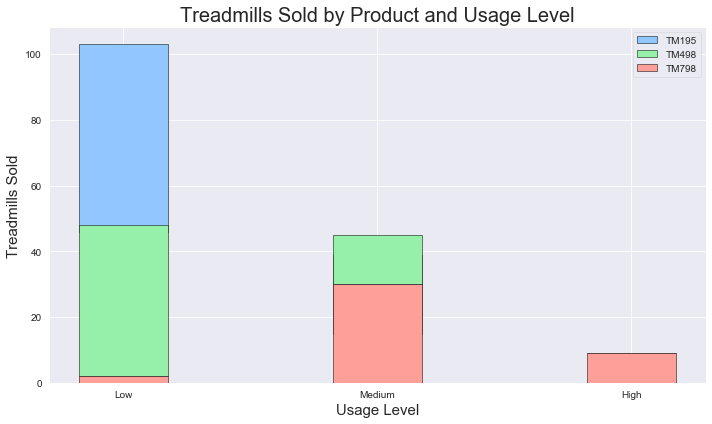

In [243]:
plt.style.use('seaborn-pastel')

# Define x-axis and y-axis data values
x_list = ["Low", "Medium", "High"]
x_labels = np.array(x_list)

# Set the width of the bars
width = 0.35 

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 

# Plot stacked bars
ax.bar(x_labels, product_TM195, width, label='TM195', bottom=product_TM498, edgecolor='black')
ax.bar(x_labels, product_TM498, width, bottom=product_TM798, label='TM498', edgecolor = 'black')
ax.bar(x_labels, product_TM798, width, label='TM798', edgecolor = 'black')

# Set title, y-axis label and show legend
ax.set_title('Treadmills Sold by Product and Usage Level', fontsize = 20)
ax.set_ylabel('Treadmills Sold', fontsize = 15)
ax.set_xlabel('Usage Level', fontsize = 15)
ax.legend()

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

### 4.8 Fitness

#### 1.	What is the relation between the fitness and miles covered by all customers?

In [244]:
df_new['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

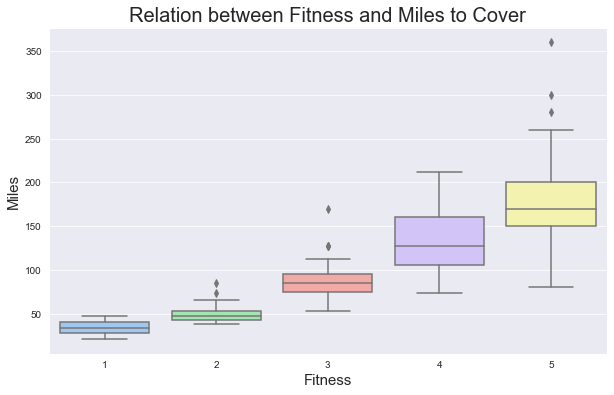

In [245]:
plt.style.use('seaborn-pastel')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Violin plot
sns.boxplot(x='Fitness', y='Miles', data=df_new)

#Set titles
ax.set_title('Relation between Fitness and Miles to Cover', fontsize = 20)
ax.set_ylabel('Miles', fontsize = 15)
ax.set_xlabel('Fitness', fontsize = 15)

# Display the plot
plt.show()

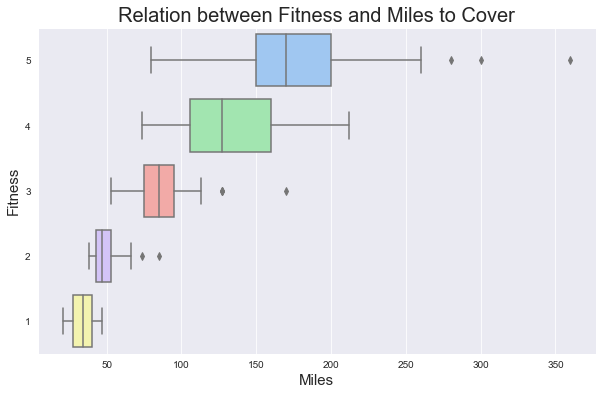

In [407]:
plt.style.use('seaborn-pastel')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Violin plot
sns.boxplot(x='Miles', y='Fitness', data=df_new, order=df_new['Fitness'].sort_values(ascending=False).unique(), orient="h")

#Set titles
ax.set_title('Relation between Fitness and Miles to Cover', fontsize = 20)
ax.set_ylabel('Fitness', fontsize = 15)
ax.set_xlabel('Miles', fontsize = 15)

# Display the plot
plt.show()

##### Another way of doing

Credits: https://plotly.com/python/box-plots/

In [394]:
df_new["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [406]:
import plotly.express as px
fig = px.box(df_new, x="Miles", y="Fitness", title="Relation between Fitness and Miles to Cover").update_yaxes(categoryorder="category ascending")
fig.update_traces(quartilemethod="exclusive") 
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

#### 2. Which gender has better fitness?

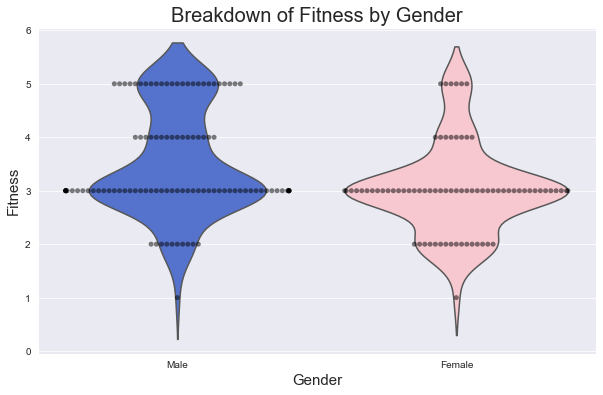

In [247]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,6))
 
# Set colour
gender_type_colors = ['#4169E1',  # Male
                    '#FFC0CB',  # Female
                   ]

# Violin plot with Pokemon color palette
sns.violinplot(x='Gender', y='Fitness', data=df_new, palette=gender_type_colors, inner=None) # Set color palette)
# Overlay swarm plot on violin plot
sns.swarmplot(x='Gender', 
              y='Fitness', 
              data=df_new, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent

# Set title with matplotlib
ax.set_title('Breakdown of Fitness by Gender', fontsize = 20)
ax.set_ylabel('Fitness', fontsize = 15)
ax.set_xlabel('Gender', fontsize = 15)

# Display the plot
plt.show()

In [248]:
y  = df_new[df_new['Gender'] == 'Female'].groupby('Fitness')['ID'].count()
female_customers = y.tolist()
female_customers

[1, 16, 45, 8, 6]

In [249]:
y  = df_new[df_new['Gender'] == 'Male'].groupby('Fitness')['ID'].count()
male_customers = y.tolist()
male_customers

[1, 10, 55, 16, 25]

In [250]:
df_new['Fitness'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

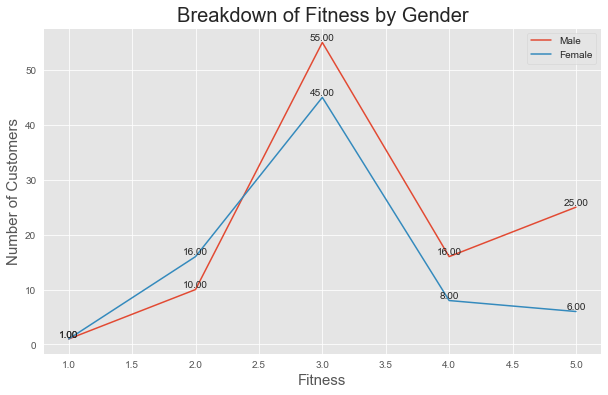

In [251]:
plt.style.use('ggplot')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Plot
sns.lineplot(x=df_new['Fitness'].sort_values().unique(), y=male_customers, data=df_new, ax = ax,
            markers="o", label="Male")
sns.lineplot(x=df_new['Fitness'].sort_values().unique(), y=female_customers, data=df_new, ax = ax,
            markers="^", label="Female")

#Set titles
ax.set_title('Breakdown of Fitness by Gender', fontsize = 20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Fitness', fontsize = 15)
ax.legend(loc='upper left')

# Display Data Labels for Female 
for x, y in zip(df_new['Fitness'].sort_values().unique(),female_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display Data Labels for Male 
for x, y in zip(df_new['Fitness'].sort_values().unique(),male_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display the plot
ax.legend()
plt.show()

#### 3.	What is the dsitribution of fitness levels by product and gender?

Credits: https://seaborn.pydata.org/generated/seaborn.violinplot.html

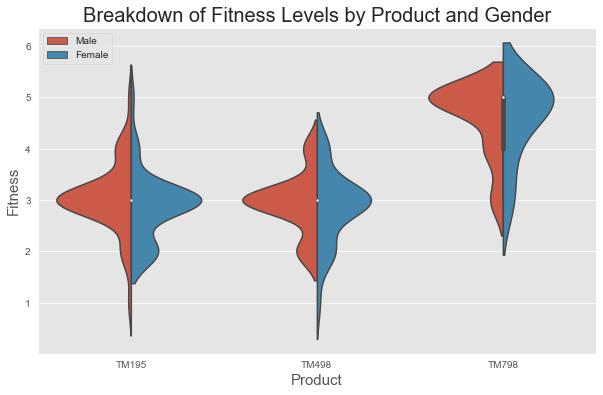

In [252]:
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 
plt.style.use('ggplot')
    
# Swarm plot
sns.catplot(x="Product", y="Fitness", kind="violin", hue="Gender", split=True, data=df_new,  aspect = 2, ax = ax)

#Set titles
ax.set_title('Breakdown of Fitness Levels by Product and Gender', fontsize = 20)
ax.set_ylabel('Fitness', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)
ax.legend(loc='upper left')

# Display the plot
plt.close(2)
plt.close(3)
plt.show()

#### 4.	What is the average fitness levels of each product by gender?

Credits: https://seaborn.pydata.org/tutorial/categorical.html \
The points plot function encodes the value of the Product type with Fitness on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes.

In [253]:
male_customers = np.array(round(df_new[df_new['Gender'] == 'Male'].groupby(['Product'])['Fitness'].mean(), 2).tolist())
male_customers

array([3.05, 2.94, 4.59])

In [254]:
female_customers = np.array(round(df_new[df_new['Gender'] == 'Female'].groupby(['Product'])['Fitness'].mean(), 2))
female_customers

array([2.88, 2.86, 4.57])

In [255]:
df_new['Product'].unique()
df_product_encoded = [0,1,2]

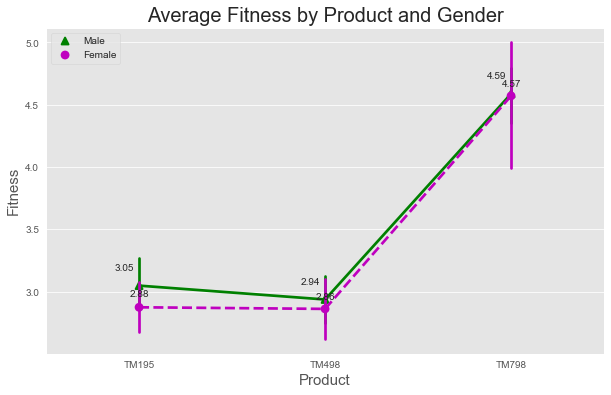

In [256]:
plt.style.use('ggplot')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 

# Plot
sns.catplot(x="Product", y="Fitness", hue="Gender", kind="point", data=df_new, aspect = 2, ax = ax,
           palette={"Male": "g", "Female": "m"},
            markers=["^", "o"], linestyles=["-", "--"])

#Set titles
ax.set_title('Average Fitness by Product and Gender', fontsize = 20)
ax.set_ylabel('Fitness', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)
ax.legend(loc='upper left')

# Display Data Labels for Female 
for x, y in zip(df_product_encoded,female_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display Data Labels for Male 
for x, y in zip(df_product_encoded,male_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(-15,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# Display the plot
plt.close(2)
plt.close(3)
plt.show()

#### 5. Which treadmill is more popular among all fitness levels?

In [257]:
df_new.groupby("Fitness")['ID'].count()

Fitness
1      2
2     26
3    100
4     24
5     31
Name: ID, dtype: int64

#### (i) Preparing array for product_TM195

In [258]:
df_new[(df_new['Product'] == 'TM195')].groupby(['Fitness'])['Product'].count()
product_TM195 = np.array([1, 14, 55, 9, 2])

#### (ii) Preparing array for product_TM498

In [259]:
df_new[(df_new['Product'] == 'TM498')].groupby(['Fitness'])['Product'].count()
product_TM498 = np.array([1, 12, 40, 8, 0])

#### (iii) Preparing array for product_TM798

In [260]:
df_new[(df_new['Product'] == 'TM798')].groupby(['Fitness'])['Product'].count()
product_TM798 = np.array([0, 0, 5, 7, 29])

#### Codes

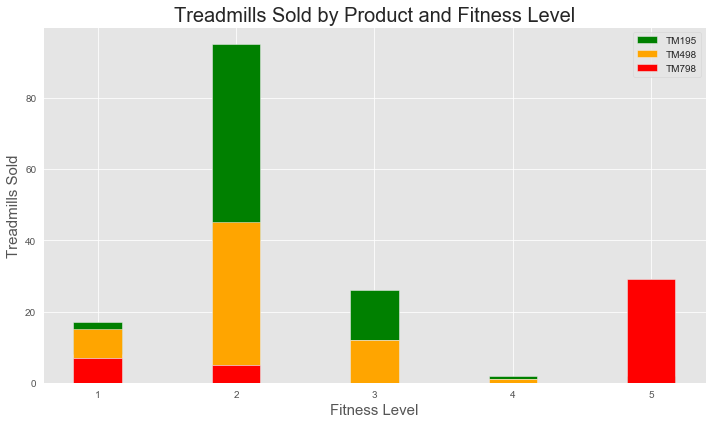

In [261]:
# Define x-axis and y-axis data values
x_labels = df_new['Fitness'].unique()

# Set the width of the bars
width = 0.35 

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6)) 

# Plot stacked bars
ax.bar(x_labels, product_TM195, width, label='TM195', bottom=product_TM498, color = 'g')
ax.bar(x_labels, product_TM498, width, bottom=product_TM798, label='TM498', color = 'orange')
ax.bar(x_labels, product_TM798, width, label='TM798', color = 'r')

# Set title, y-axis label and show legend
ax.set_title('Treadmills Sold by Product and Fitness Level', fontsize = 20)
ax.set_ylabel('Treadmills Sold', fontsize = 15)
ax.set_xlabel('Fitness Level', fontsize = 15)
ax.legend()

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

##### Another way of doing

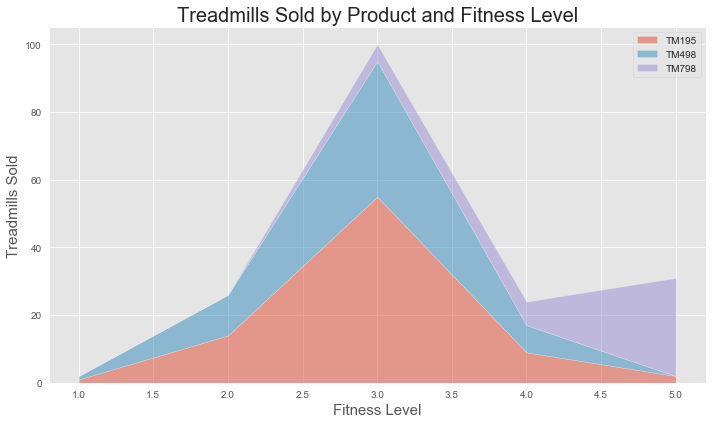

In [262]:
# Your x and y axis
fig, ax = plt.subplots(figsize=(10,6)) 
x=range(1,6)
y=[product_TM195, product_TM498, product_TM798]
 
# Basic stacked area chart.
ax = plt.stackplot(x,y, labels=['TM195','TM498','TM798'], alpha=0.5)

# Set title, y-axis label and show legend
plt.title('Treadmills Sold by Product and Fitness Level', fontsize = 20)
plt.ylabel('Treadmills Sold', fontsize = 15)
plt.xlabel('Fitness Level', fontsize = 15)
plt.legend(loc='upper right')

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

### 4.9 Income

#### 1. What is the average income of all customers?

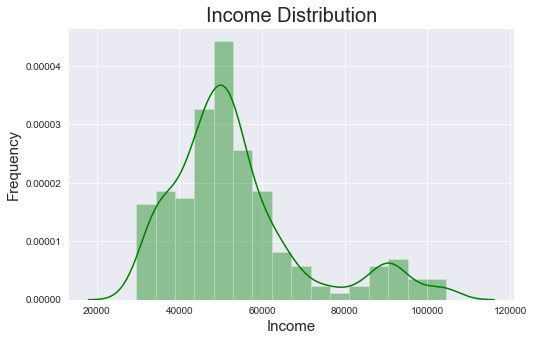

In [263]:
# Set figure size with matplotlib
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8,5))

# Plot a histogram and kernel density estimate
ax1 = sns.distplot(df_new['Income'], color="g")
ax1.set_title("Income Distribution", fontsize = 20)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Income', fontsize = 15)

# Display the plot
plt.show()

#### 2.What is the relation between income of customers and the treadmill model purchased?

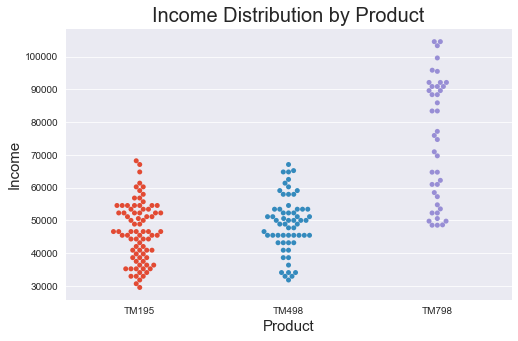

In [264]:
# Set figure size
fig, ax = plt.subplots(figsize=(8,5))

# Create Swarm plot with Pokemon color palette
sns.swarmplot(x="Product", y="Income", data=df_new)
ax.set_title("Income Distribution by Product", fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)

# Display the plot
plt.show()

##### Another way of doing

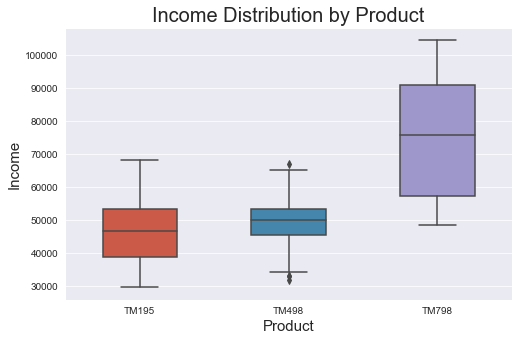

In [265]:
# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(8,5))

# Plot a histogram and kernel density estimate
ax = sns.boxplot(x="Product", y="Income", data=df_new, width=0.5)
ax.set_title("Income Distribution by Product", fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)

# Display the plot
plt.show()

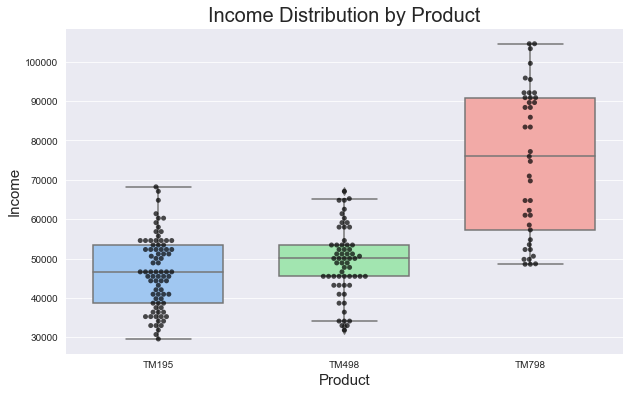

In [302]:
plt.style.use('seaborn-pastel')
sns.set_style("darkgrid")

# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(10,6))

# Create Swarm plot
sns.swarmplot(x="Product", y="Income", data=df_new, color='black', alpha=0.7)
ax.set_title("Income Distribution by Product", fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)

# Plot a histogram and kernel density estimate
ax = sns.boxplot(x="Product", y="Income", data=df_new, width=0.7)
ax.set_title("Income Distribution by Product", fontsize = 20)
ax.set_ylabel('Income', fontsize = 15)
ax.set_xlabel('Product', fontsize = 15)

# Display the plot
plt.show()

#### 3. What is the correlation between income and age by product?

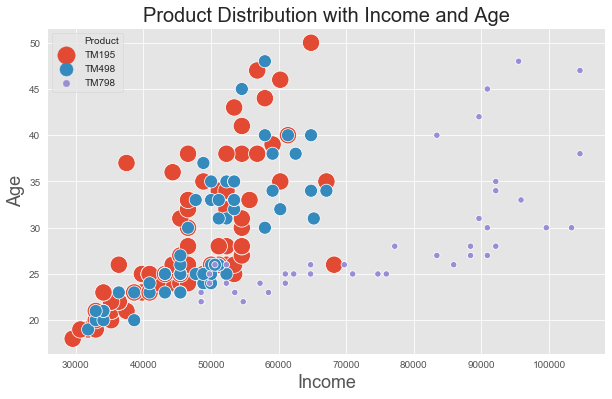

In [267]:
plt.style.use('ggplot')
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

# Plot scatterplot
sns.scatterplot(data=df_new, x="Income", y="Age", hue="Product", sizes=(40, 300), size="Product")

# Labels
ax.set_title('Product Distribution with Income and Age', fontsize = 20)
ax.set_ylabel('Age', fontsize = 18)
ax.set_xlabel('Income', fontsize = 18)

# Display the plot
plt.show()

##### Another way of doing

Credits: https://plotly.com/python/ml-regression/

In [306]:
df = px.data.tips()
fig = px.scatter(
    df_new, x='Income', y='Age', color="Product", opacity=0.65, title="Product Distribution with Income and Age"
)
fig.show()

#### Extra:

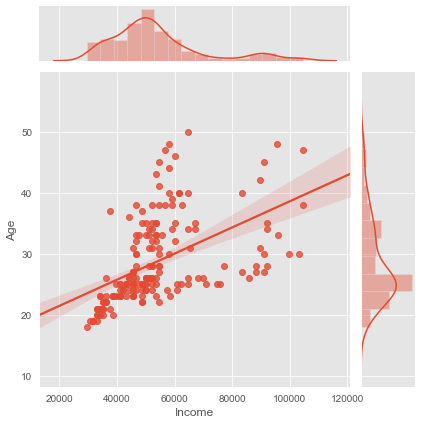

In [268]:
plt.style.use('ggplot')
# Joint Distribution Plot
sns.jointplot(x='Income', y='Age', data=df_new, kind='reg')

# Labels
ax.set_title('Distribution of Age vs Income', fontsize = 20)
ax.set_ylabel('Age', fontsize = 18)
ax.set_xlabel('Income', fontsize = 18)

# Display the plot
plt.show()

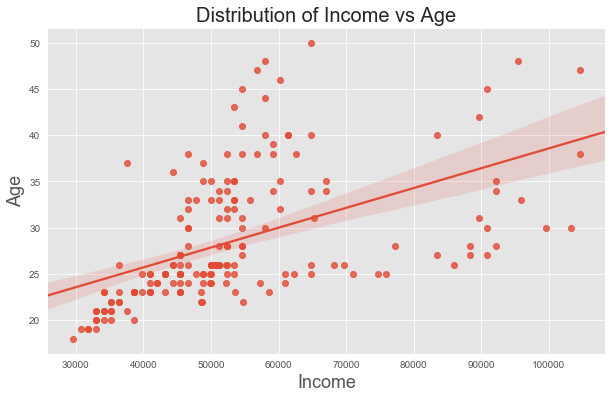

In [269]:
plt.style.use('ggplot')
# Create a Scatterplot using seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Income', y='Age', data=df_new, ax=ax)
 
ax.set_title('Distribution of Income vs Age', fontsize = 20)
ax.set_ylabel('Age', fontsize = 18)
ax.set_xlabel('Income', fontsize = 18)

# Display the plot
plt.show()

### 4.10 Miles

Credits: https://seaborn.pydata.org/tutorial/categorical.html \
A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

#### 1.	What is the average number of miles a customer expects to cover in a week by gender?

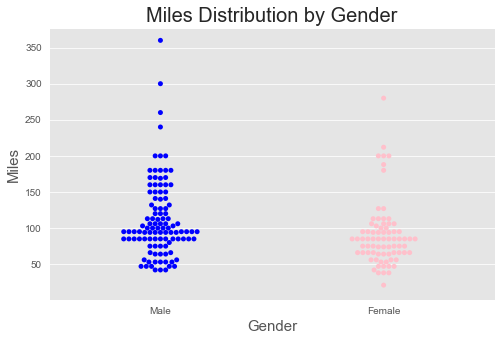

In [271]:
# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
plt.style.use('ggplot')
sns.set_style("darkgrid")

# Plot a histogram and kernel density estimate
sns.catplot(x="Gender", y="Miles",
            kind="swarm", data=df_new, ax = ax, aspect=2, palette={"Male": "blue", "Female":"pink"})
ax.set_title("Miles Distribution by Gender", fontsize = 20)
ax.set_ylabel('Miles', fontsize = 15)
ax.set_xlabel('Gender', fontsize = 15)

# Display the plot
plt.close(2)
plt.close(3)
plt.show()

#### 2. Is there a correlation between the number of miles to cover and the treadmill models bought?

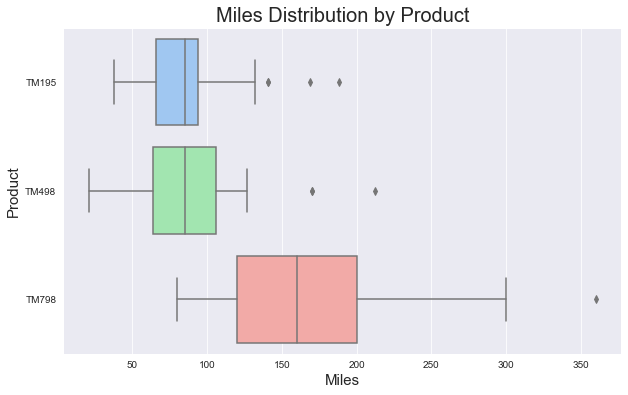

In [272]:
sns.set_style('darkgrid')
plt.style.use('seaborn-pastel')
# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(10,6))
sns.catplot(x="Miles", y="Product",
                kind="box", orient="h", aspect=2,
                data=df_new, ax=ax)

ax.set_title("Miles Distribution by Product", fontsize = 20)
ax.set_ylabel('Product', fontsize = 15)
ax.set_xlabel('Miles', fontsize = 15)

# Display the plot
plt.close(2)
plt.close(3)
plt.show()

##### Another way of doing

Credits: https://plotly.com/python/box-plots/

In [394]:
df_new["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [410]:
import plotly.express as px
fig = px.box(df_new, x="Miles", y="Product", title="Miles Distribution by Product").update_yaxes(categoryorder="category descending")
fig.update_traces(quartilemethod="exclusive") 
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

#### 3. What is the correlation between age and miles covered?

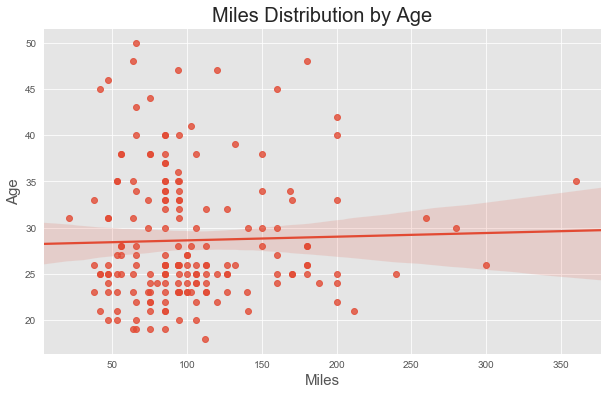

In [273]:
sns.set_style('darkgrid')
plt.style.use('ggplot')
# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='Miles', y='Age', data=df_new)

ax.set_title("Miles Distribution by Age", fontsize = 20)
ax.set_ylabel('Age', fontsize = 15)
ax.set_xlabel('Miles', fontsize = 15)

# Display the plot
plt.show()

In [88]:
import plotly.express as px
fig = px.scatter(df_new, x="Miles", y="Age", trendline="ols", title="Miles Distribution by Age")
fig.show()

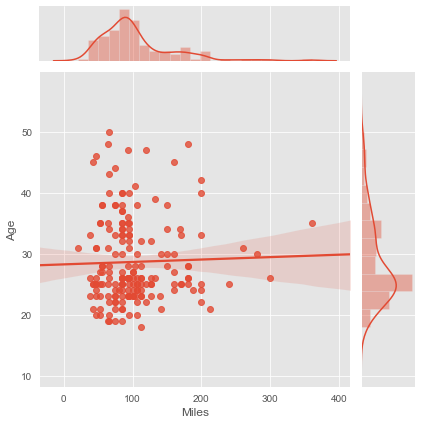

In [274]:
# Joint Distribution Plot
sns.jointplot(x='Miles', y='Age', data=df_new, kind='reg')

# Display the plot
plt.show()

#### 4. What is the correlation between usage and miles covered?

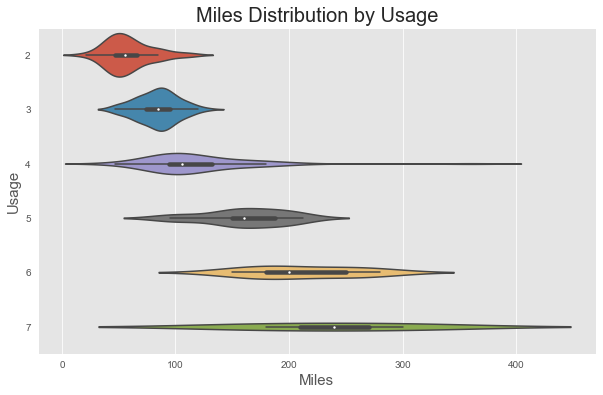

In [275]:
# Plot the orbital period with horizontal boxes
fig, ax = plt.subplots(figsize=(10,6))
sns.catplot(x="Miles", y="Usage", data=df_new, kind="violin", orient='h', ax=ax, aspect=2)
ax.set_title("Miles Distribution by Usage", fontsize = 20)
ax.set_ylabel('Usage', fontsize = 15)
ax.set_xlabel('Miles', fontsize = 15)

# Add in points to show each observation
sns.stripplot(x="Miles", y="Fitness", data=df_new,
              size=4, color=".3", linewidth=0, orient='h')

plt.close(2)
plt.close(3)

#### Another way of doing

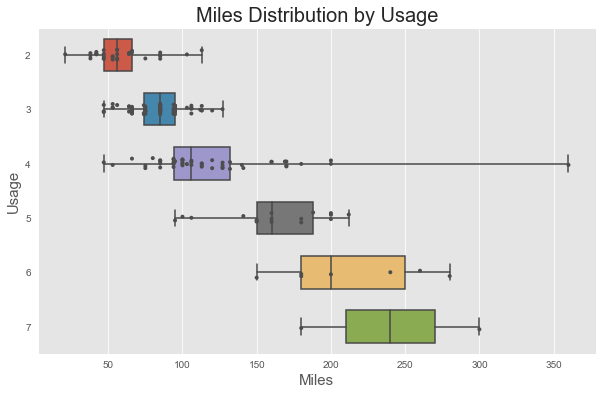

In [276]:
# Plot the orbital period with horizontal boxes
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="Miles", y="Usage", data=df_new,
            whis=[0, 100], width=.6, orient='h')
ax.set_title("Miles Distribution by Usage", fontsize = 20)
ax.set_ylabel('Usage', fontsize = 15)
ax.set_xlabel('Miles', fontsize = 15)

# Add in points to show each observation
sns.stripplot(x="Miles", y="Usage", data=df_new,
              size=4, color=".3", linewidth=0, orient='h')

## 5. Dashboard

In [277]:
from matplotlib.gridspec import GridSpec

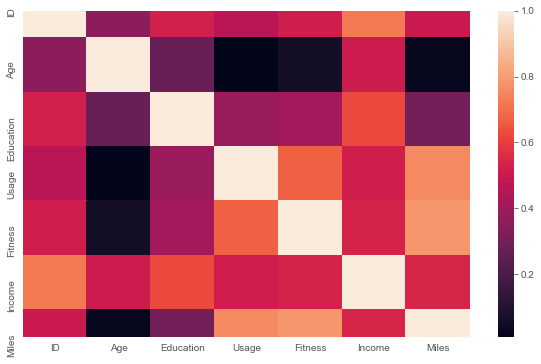

In [278]:
# Enter your code here:

# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Calculate correlations of feature-pairs in df_stats
corr = df_new.corr()
 
# Create heatmap
sns.heatmap(corr)

# Display the plot
plt.show()

## 5.1 Customer's Treadmill Preferences

Text(0.5, 0.98, 'Customer Demographics of Cardio Good Fitness\n')

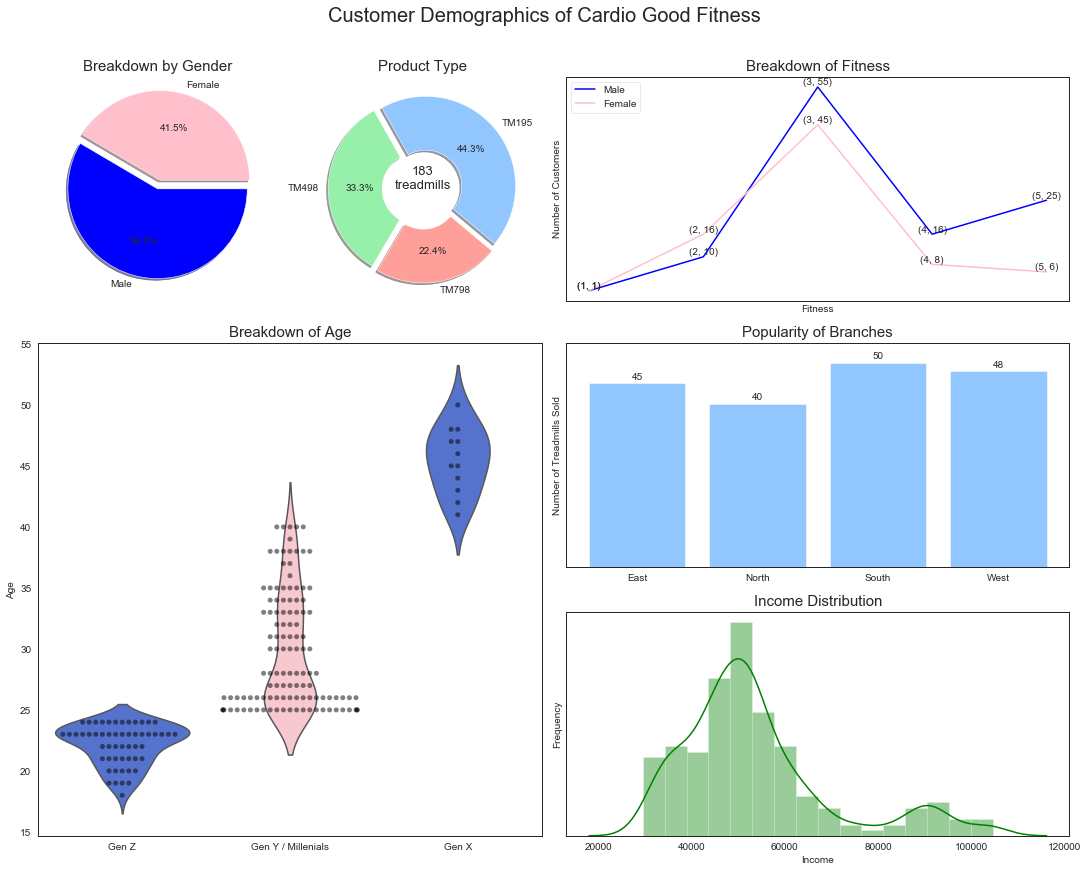

In [279]:
plt.style.use('seaborn-pastel')
sns.set_style("white")

#Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)


# Treadmills bought by Gender
ax1 = fig.add_subplot(gs[0, 0])
frequency = df_new.groupby('Gender')['ID'].count()
rt = frequency.index
ax1.pie(frequency, labels=rt, autopct='%1.1f%%', explode=(0.1,0), shadow=True, colors=['pink','blue'])
ax1.set_title("Breakdown by Gender", fontsize=15)



# By Fitness
ax2 = fig.add_subplot(gs[0,2:])
y  = df_new[df_new['Gender'] == 'Female'].groupby('Fitness')['ID'].count()
female_customers = y.tolist()
y  = df_new[df_new['Gender'] == 'Male'].groupby('Fitness')['ID'].count()
male_customers = y.tolist()
sns.lineplot(x=df_new['Fitness'].sort_values().unique(), y=male_customers, data=df_new, ax = ax2,
            markers="o", label="Male", color="blue")
sns.lineplot(x=df_new['Fitness'].sort_values().unique(), y=female_customers, data=df_new, ax = ax2,
            markers="^", label="Female", color="pink")
ax2.set_title('Breakdown of Fitness', fontsize = 15)
ax2.set_ylabel('Number of Customers', fontsize = 10)
ax2.set_xlabel('Fitness', fontsize = 10)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(loc='upper left')
for x, y in zip(df_new['Fitness'].sort_values().unique(),female_customers): # zip joins x and y coordinates in pairs

    label = "({:}, {:})".format(x,y) # value of data label to display

    ax2.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x, y in zip(df_new['Fitness'].sort_values().unique(),male_customers): # zip joins x and y coordinates in pairs

    label = "({:}, {:})".format(x,y) # value of data label to display

    ax2.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    


# Treadmill Models sold by Age
ax3 = fig.add_subplot(gs[1:, :2])
ax3 = sns.violinplot(x='Generation', y='Age', data = df_new, inner = None,
               palette=gender_type_colors) # Set color palette)
sns.swarmplot(x='Generation', y='Age', data = df_new, 
              color='k', # Make points black and 
              alpha=0.5, ax=ax3) # slightly transparent
ax3.set_title('Breakdown of Age', fontsize = 15)
ax3.set_ylabel('Age', fontsize = 10)
ax3.set(xlabel=None)


# Popularity of branches to purchase treadmills
ax4 = fig.add_subplot(gs[1, 2:])
y_vals  = df_new.groupby('Branch')['Branch'].count()
x_vals = y_vals.index
x_pos = np.arange(len(x_vals))  
bar1 = ax4.bar(x_pos, y_vals, align='center')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(x_vals)
ax4.set_yticks([])
ax4.set(xlabel=None)
ax4.set_ylabel('Number of Treadmills Sold', fontsize = 10)
ax4.set_title('Popularity of Branches',fontsize = 15)
ax4.set_ylim([0,55])
for each in bar1:
    height = each.get_height()
    ax4.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')



# Treadmills bought by Product Type
ax5 = fig.add_subplot(gs[0,1])
frequency = df_new.groupby('Product')['ID'].count()
rt = frequency.index
ax5.pie(frequency, labels=rt, autopct='%1.1f%%', wedgeprops=dict(width=0.6), pctdistance=0.65, explode = (0.05,0.05,0.05), startangle=-40, shadow=True)
ax5.annotate('183\ntreadmills', xy=(0,0), fontsize=13, horizontalalignment='center')
ax5.set_title("Product Type", fontsize=15)

    

# Income DIstribution
ax6 = fig.add_subplot(gs[2, 2:])
ax6 = sns.distplot(df_new['Income'], color="g")
ax6.set_title("Income Distribution", fontsize = 15)
ax6.set_ylabel('Frequency', fontsize = 10)
ax6.set_xlabel('Income', fontsize = 10)
ax6.set_yticks([])

# Set title of dashboard
fig.suptitle("Customer Demographics of Cardio Good Fitness\n", fontsize=20)

##### 1. Filtered by Gender: Males

In [280]:
df_male = df_new[df_new["Gender"] == "Male"]
df_male.count()

ID               107
Product          107
Branch           107
Age              107
Gender           107
Education        107
MaritalStatus    107
Usage            107
Fitness          107
Income           107
Miles            107
Generation       107
Usage_Level      107
dtype: int64

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 0.98, 'Customer Demographics of Cardio Good Fitness (Males)\n')

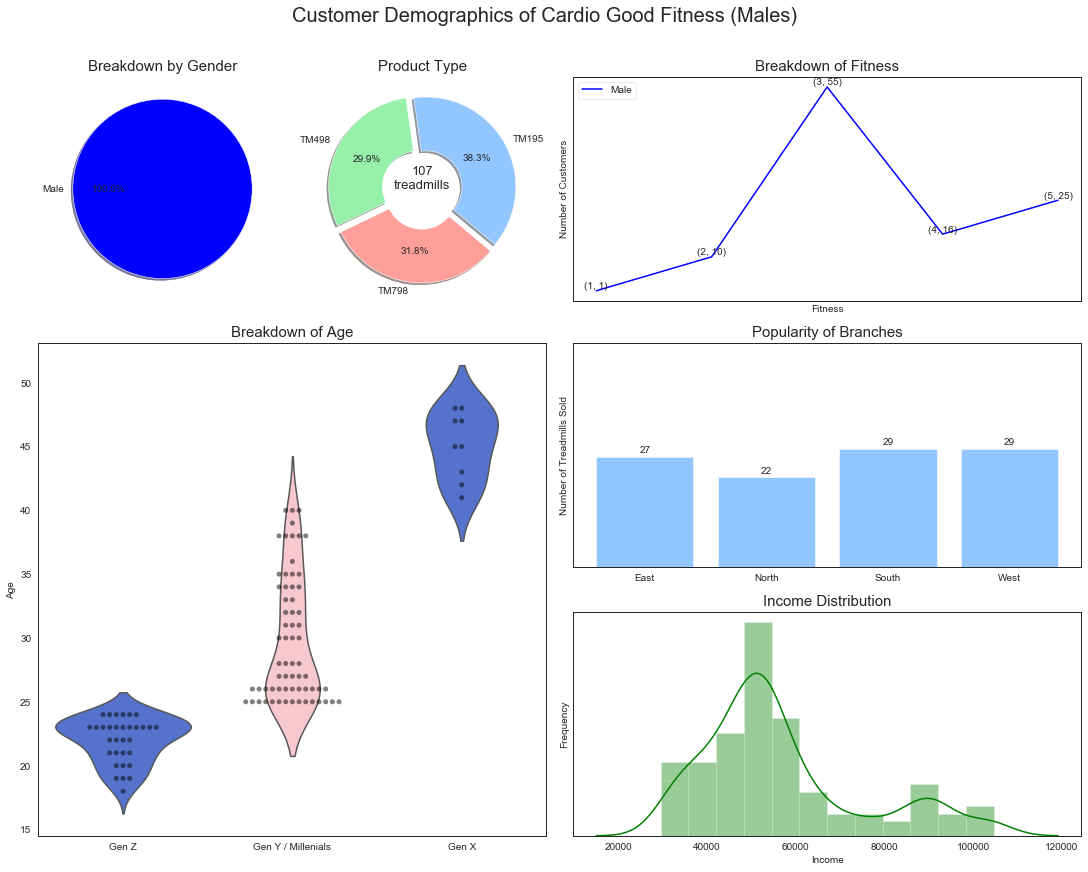

In [281]:
plt.style.use('seaborn-pastel')
sns.set_style("white")

#Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)


# Treadmills bought by Gender
ax1 = fig.add_subplot(gs[0, 0])
frequency = df_male[df_new["Gender"] == "Male"].groupby('Gender')['ID'].count()
rt = frequency.index
ax1.pie(frequency, labels=rt, autopct='%1.1f%%', shadow=True, colors='blue')
ax1.set_title("Breakdown by Gender", fontsize=15)


# By Fitness
ax2 = fig.add_subplot(gs[0,2:])
y  = df_male[df_male['Gender'] == 'Male'].groupby('Fitness')['ID'].count()
male_customers = y.tolist()
sns.lineplot(x=df_male['Fitness'].sort_values().unique(), y=male_customers, data=df_male, ax = ax2,
            markers="o", label="Male", color="blue")
ax2.set_title('Breakdown of Fitness', fontsize = 15)
ax2.set_ylabel('Number of Customers', fontsize = 10)
ax2.set_xlabel('Fitness', fontsize = 10)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(loc='upper left')
for x, y in zip(df_male['Fitness'].sort_values().unique(),male_customers): # zip joins x and y coordinates in pairs

    label = "({:}, {:})".format(x,y) # value of data label to display

    ax2.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



# Treadmill Models sold by Age
ax3 = fig.add_subplot(gs[1:, :2])
ax3 = sns.violinplot(x='Generation', y='Age', data = df_male, inner = None,
               palette=gender_type_colors) # Set color palette)
sns.swarmplot(x='Generation', y='Age', data = df_male, 
              color='k', # Make points black and 
              alpha=0.5, ax=ax3) # slightly transparent
ax3.set_title('Breakdown of Age', fontsize = 15)
ax3.set_ylabel('Age', fontsize = 10)
ax3.set(xlabel=None)


# Popularity of branches to purchase treadmills
ax4 = fig.add_subplot(gs[1, 2:])
y_vals  = df_male.groupby('Branch')['Branch'].count()
x_vals = y_vals.index
x_pos = np.arange(len(x_vals))  
bar1 = ax4.bar(x_pos, y_vals, align='center')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(x_vals)
ax4.set_yticks([])
ax4.set(xlabel=None)
ax4.set_ylabel('Number of Treadmills Sold', fontsize = 10)
ax4.set_title('Popularity of Branches',fontsize = 15)
ax4.set_ylim([0,55])
for each in bar1:
    height = each.get_height()
    ax4.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')



# Treadmills bought by Product Type
ax5 = fig.add_subplot(gs[0,1])
frequency = df_male.groupby('Product')['ID'].count()
rt = frequency.index
ax5.pie(frequency, labels=rt, autopct='%1.1f%%', wedgeprops=dict(width=0.6), pctdistance=0.65, explode = (0.05,0.05,0.05), startangle=-40, shadow=True)
ax5.annotate('107\ntreadmills', xy=(0,0), fontsize=13, horizontalalignment='center')
ax5.set_title("Product Type", fontsize=15)


# Income DIstribution
ax6 = fig.add_subplot(gs[2, 2:])
ax6 = sns.distplot(df_male['Income'], color="g")
ax6.set_title("Income Distribution", fontsize = 15)
ax6.set_ylabel('Frequency', fontsize = 10)
ax6.set_xlabel('Income', fontsize = 10)
ax6.set_yticks([])

# Set title of dashboard
fig.suptitle("Customer Demographics of Cardio Good Fitness (Males)\n", fontsize=20)

##### 2. Filtered by Gender: Feales

In [282]:
df_female = df_new[df_new["Gender"] == "Female"]
df_female.count()

ID               76
Product          76
Branch           76
Age              76
Gender           76
Education        76
MaritalStatus    76
Usage            76
Fitness          76
Income           76
Miles            76
Generation       76
Usage_Level      76
dtype: int64

C:\Users\sammi\Anaconda3\envs\Python-3.6\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 0.98, 'Customer Demographics of Cardio Good Fitness (Females)\n')

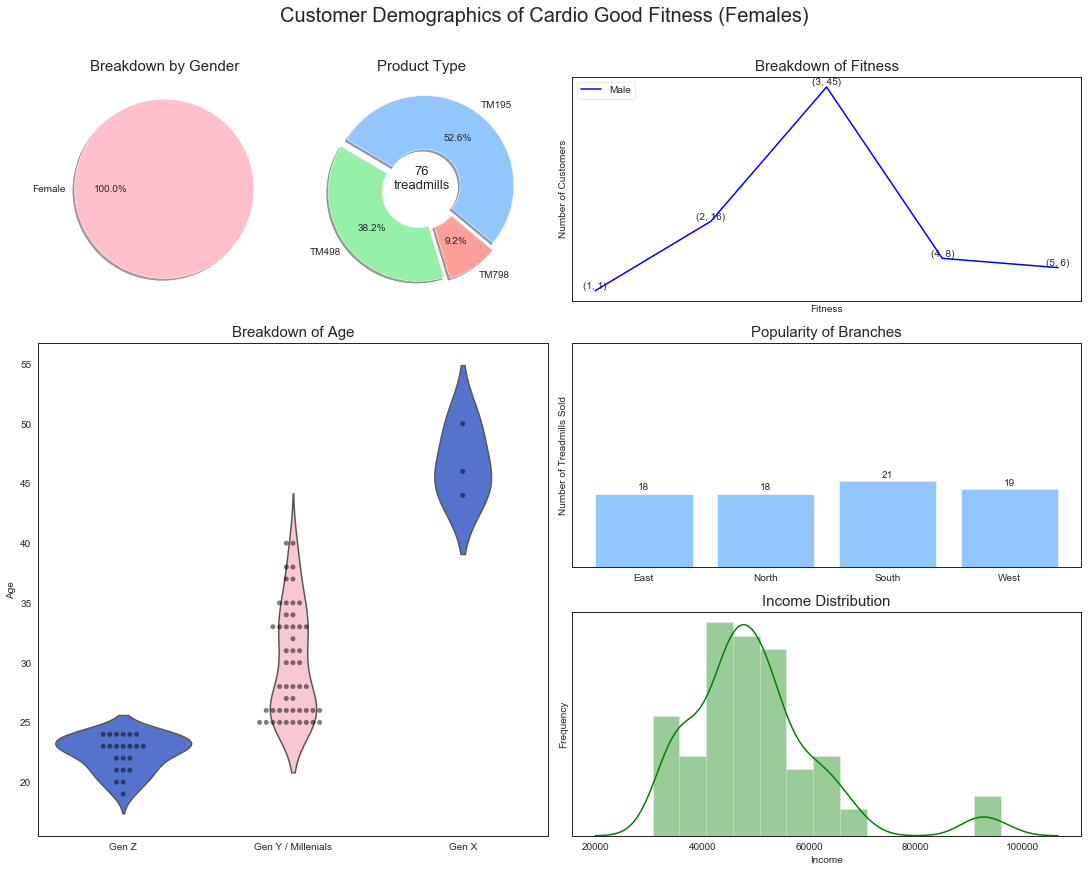

In [283]:
plt.style.use('seaborn-pastel')
sns.set_style("white")

#Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)


# Treadmills bought by Gender
ax1 = fig.add_subplot(gs[0, 0])
frequency = df_female[df_new["Gender"] == "Female"].groupby('Gender')['ID'].count()
rt = frequency.index
ax1.pie(frequency, labels=rt, autopct='%1.1f%%', shadow=True, colors=['pink','blue'])
ax1.set_title("Breakdown by Gender", fontsize=15)


# By Fitness
ax2 = fig.add_subplot(gs[0,2:])
y  = df_new[df_new['Gender'] == 'Female'].groupby('Fitness')['ID'].count()
female_customers = y.tolist()
sns.lineplot(x=df_female['Fitness'].sort_values().unique(), y=female_customers, data=df_female, ax = ax2,
            markers="o", label="Male", color="blue")
ax2.set_title('Breakdown of Fitness', fontsize = 15)
ax2.set_ylabel('Number of Customers', fontsize = 10)
ax2.set_xlabel('Fitness', fontsize = 10)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(loc='upper left')
for x, y in zip(df_female['Fitness'].sort_values().unique(),female_customers): # zip joins x and y coordinates in pairs

    label = "({:}, {:})".format(x,y) # value of data label to display

    ax2.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



# Treadmill Models sold by Age
ax3 = fig.add_subplot(gs[1:, :2])
ax3 = sns.violinplot(x='Generation', y='Age', data = df_female, inner = None,
               palette=gender_type_colors) # Set color palette)
sns.swarmplot(x='Generation', y='Age', data = df_female, 
              color='k', # Make points black and 
              alpha=0.5, ax=ax3) # slightly transparent
ax3.set_title('Breakdown of Age', fontsize = 15)
ax3.set_ylabel('Age', fontsize = 10)
ax3.set(xlabel=None)


# Popularity of branches to purchase treadmills
ax4 = fig.add_subplot(gs[1, 2:])
y_vals  = df_female.groupby('Branch')['Branch'].count()
x_vals = y_vals.index
x_pos = np.arange(len(x_vals))  
bar1 = ax4.bar(x_pos, y_vals, align='center')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(x_vals)
ax4.set_yticks([])
ax4.set(xlabel=None)
ax4.set_ylabel('Number of Treadmills Sold', fontsize = 10)
ax4.set_title('Popularity of Branches',fontsize = 15)
ax4.set_ylim([0,55])
for each in bar1:
    height = each.get_height()
    ax4.annotate('{}'.format(height),
        xy=(each.get_x() + each.get_width() / 2, height),
        xytext=(0, 2),  # 2 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')



# Treadmills bought by Product Type
ax5 = fig.add_subplot(gs[0,1])
frequency = df_female.groupby('Product')['ID'].count()
rt = frequency.index
ax5.pie(frequency, labels=rt, autopct='%1.1f%%', wedgeprops=dict(width=0.6), pctdistance=0.65, explode = (0.05,0.05,0.05), startangle=-40, shadow=True)
ax5.annotate('76\ntreadmills', xy=(0,0), fontsize=13, horizontalalignment='center')
ax5.set_title("Product Type", fontsize=15)


# Income DIstribution
ax6 = fig.add_subplot(gs[2, 2:])
ax6 = sns.distplot(df_female['Income'], color="g")
ax6.set_title("Income Distribution", fontsize = 15)
ax6.set_ylabel('Frequency', fontsize = 10)
ax6.set_xlabel('Income', fontsize = 10)
ax6.set_yticks([])

# Set title of dashboard
fig.suptitle("Customer Demographics of Cardio Good Fitness (Females)\n", fontsize=20)

## 5.2 Customer's Fitness

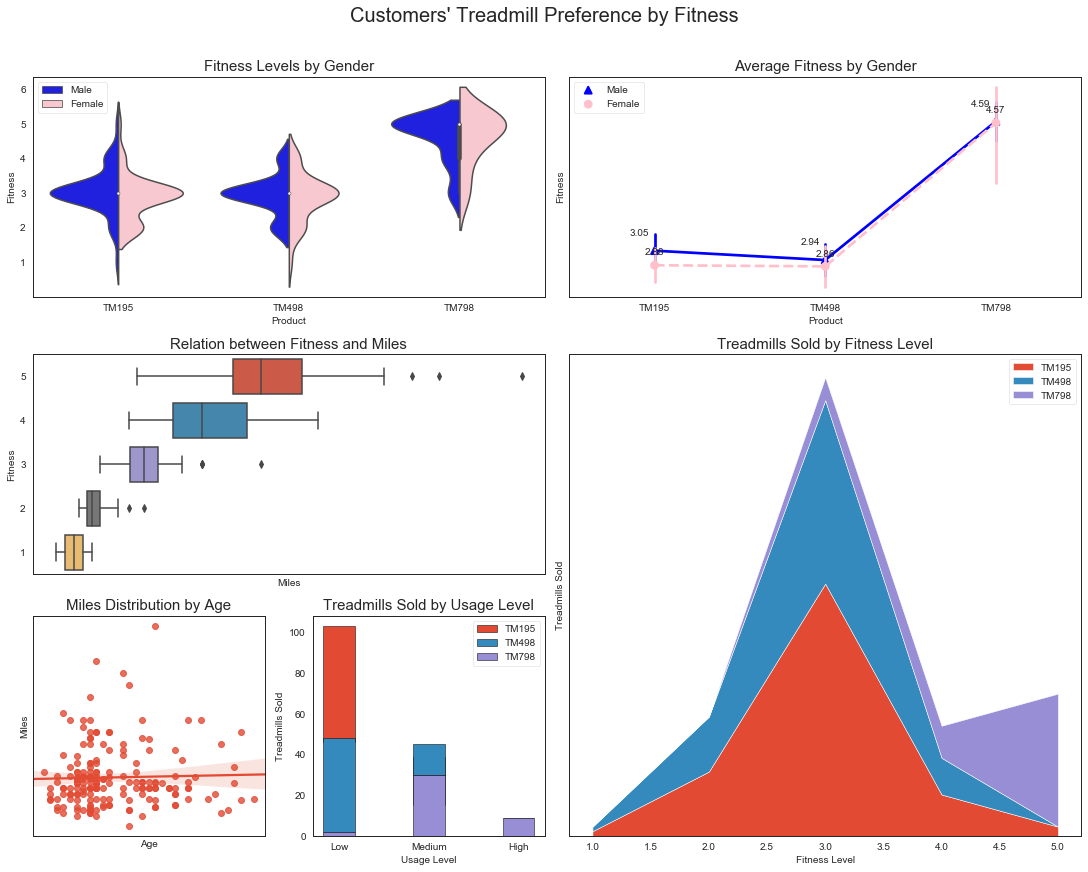

In [284]:
plt.style.use('ggplot')
sns.set_style("white")

#Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)


# Breakdown of Fitness Levels by Product and Gender
ax1 = fig.add_subplot(gs[0, :2])
my_pal = {"Female": "pink", "Male": "blue"}
sns.catplot(x="Product", y="Fitness", kind="violin", hue="Gender", split=True, data=df_new,  aspect = 2, palette=my_pal, ax = ax1)
ax1.set_title('Fitness Levels by Gender', fontsize = 15)
ax1.set_ylabel('Fitness', fontsize = 10)
ax1.set_xlabel('Product', fontsize = 10)
ax1.legend(loc='upper left')
plt.close(2)
plt.close(3)


# Treadmills Sold by Fitness Level
df_new.groupby("Fitness")['ID'].count()
df_new[(df_new['Product'] == 'TM195')].groupby(['Fitness'])['Product'].count()
product_TM195 = np.array([1, 14, 55, 9, 2])
df_new[(df_new['Product'] == 'TM498')].groupby(['Fitness'])['Product'].count()
product_TM498 = np.array([1, 12, 40, 8, 0])
df_new[(df_new['Product'] == 'TM798')].groupby(['Fitness'])['Product'].count()
product_TM798 = np.array([0, 0, 5, 7, 29])
ax2 = fig.add_subplot(gs[1:, 2:])
x=range(1,6)
y=[product_TM195, product_TM498, product_TM798]
ax2 = plt.stackplot(x,y, labels=['TM195','TM498','TM798'])
plt.title('Treadmills Sold by Fitness Level', fontsize = 15)
plt.ylabel('Treadmills Sold', fontsize = 10)
plt.xlabel('Fitness Level', fontsize = 10)
plt.yticks([])
plt.legend(loc='upper right')


# Miles Distribution by Usage
ax3 = fig.add_subplot(gs[2, 1])
df_new.groupby("Usage_Level")['ID'].count()
df_new[(df_new['Product'] == 'TM195')].groupby(['Usage_Level', 'Product'])['Product'].count().tolist()
df_new['Usage_Level'].unique()
df_new[(df_new['Product'] == 'TM195')].groupby(['Usage_Level'])['Product'].count()
product_TM195 = [57, 24, 0]
product_TM195 = np.array(product_TM195)
df_new[(df_new['Product'] == 'TM498')].groupby(['Usage_Level'])['Product'].count()
product_TM498 = [46, 15, 0]
product_TM498 = np.array(product_TM498)
df_new[(df_new['Product'] == 'TM798')].groupby(['Usage_Level'])['Product'].count()
product_TM798 = [2, 30, 9]
product_TM798 = np.array(product_TM798)
x_list = ["Low", "Medium", "High"]
x_labels = np.array(x_list)
width = 0.35 
ax3.bar(x_labels, product_TM195, width, label='TM195', bottom=product_TM498, edgecolor='black')
ax3.bar(x_labels, product_TM498, width, bottom=product_TM798, label='TM498', edgecolor = 'black')
ax3.bar(x_labels, product_TM798, width, label='TM798', edgecolor = 'black')
ax3.set_title('Treadmills Sold by Usage Level', fontsize = 15)
ax3.set_ylabel('Treadmills Sold', fontsize = 10)
ax3.set_xlabel('Usage Level', fontsize = 10)
ax3.legend()


# Miles Distribution by Age
ax4 = fig.add_subplot(gs[2, 0])
sns.regplot(x='Age', y='Miles', data=df_new, ax=ax4)
ax4.set_title("Miles Distribution by Age", fontsize = 15)
ax4.set_ylabel('Miles', fontsize = 10)
ax4.set_xlabel('Age', fontsize = 10)
ax4.set_xticks([])
ax4.set_yticks([])


# Relation between Fitness and Miles
ax5 = fig.add_subplot(gs[1, :2])
sns.boxplot(x='Miles', y='Fitness', data=df_new, orient="h", order=df_new['Fitness'].sort_values(ascending=False).unique(), ax=ax5)
ax5.set_title('Relation between Fitness and Miles', fontsize = 15)
ax5.set_ylabel('Fitness', fontsize = 10)
ax5.set_xlabel('Miles', fontsize = 10)
ax5.set_xticks([])


# Average Fitness by Gender
ax6 = fig.add_subplot(gs[0, 2:])
male_customers = np.array(round(df_new[df_new['Gender'] == 'Male'].groupby(['Product'])['Fitness'].mean(), 2).tolist())
male_customers
female_customers = np.array(round(df_new[df_new['Gender'] == 'Female'].groupby(['Product'])['Fitness'].mean(), 2))
female_customers
df_new['Product'].unique()
df_product_encoded = [0,1,2]
sns.catplot(x="Product", y="Fitness", hue="Gender", kind="point", data=df_new, aspect = 2, ax = ax6, palette=my_pal,
            markers=["^", "o"], linestyles=["-", "--"])
ax6.set_title('Average Fitness by Gender', fontsize = 15)
ax6.set_ylabel('Fitness', fontsize = 10)
ax6.set_xlabel('Product', fontsize = 10)
ax6.set_yticks([])
ax6.legend(loc='upper left')
for x, y in zip(df_product_encoded,female_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax6.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x, y in zip(df_product_encoded,male_customers): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    ax6.annotate(label, xy = (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(-15,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.close(2)
plt.close(3)


# Set title of dashboard
fig.suptitle("Customers' Treadmill Preference by Fitness\n", fontsize=20)

# Display the plot
plt.show()

In [285]:
df_new[['Age', 'Fitness', 'Usage']].describe()

Age     Fitness       Usage
count  183.000000  183.000000  183.000000
mean    28.644809    3.306011    3.448087
std      6.912289    0.951758    1.077382
min     18.000000    1.000000    2.000000
25%     24.000000    3.000000    3.000000
50%     26.000000    3.000000    3.000000
75%     33.000000    4.000000    4.000000
max     50.000000    5.000000    7.000000

## 5.3 Customer's Spending Abilities

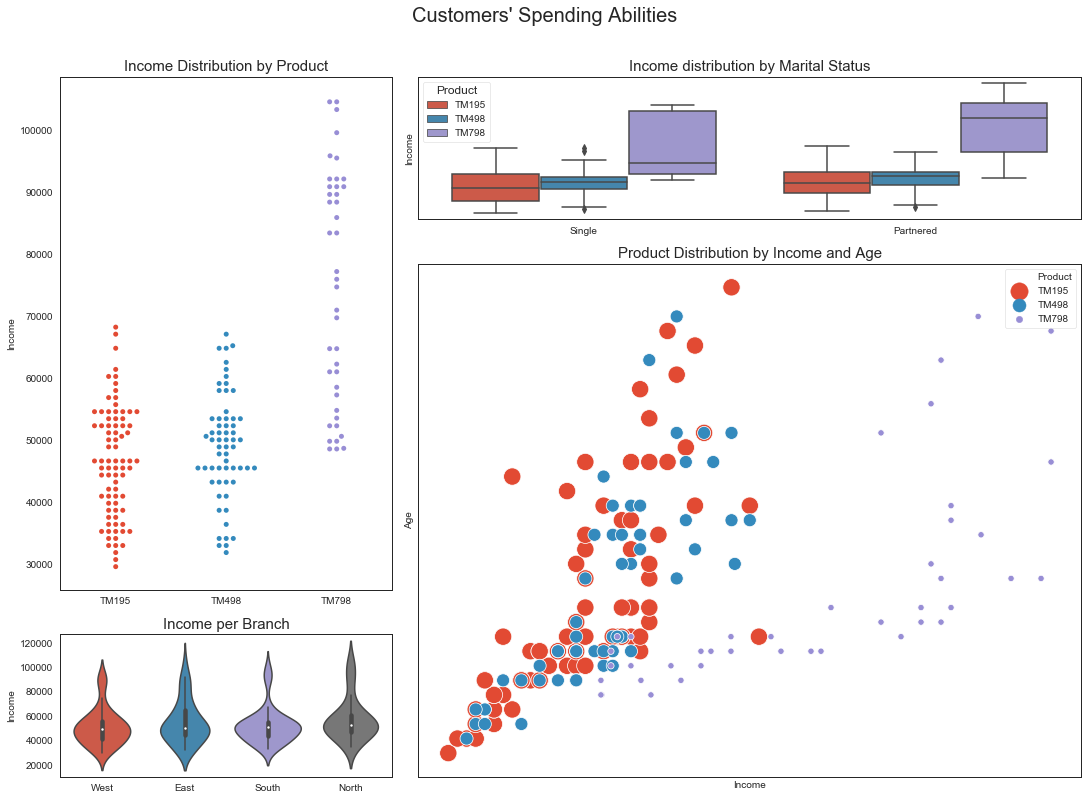

In [286]:
plt.style.use('ggplot')
sns.set_style("white")

#Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,11), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=3, figure=fig)


# Income Distribution by Product
ax1 = fig.add_subplot(gs[:2, :1])
sns.swarmplot(x="Product", y="Income", data=df_new, ax=ax1)
ax1.set_title("Income Distribution by Product", fontsize = 15)
ax1.set_ylabel('Income', fontsize = 10)
ax1.set_xlabel('Product', fontsize = 10)
ax1.set(xlabel=None)


# Income distribution by Marital Status
ax2 = fig.add_subplot(gs[0, 1:])
sns.boxplot(x="MaritalStatus", y='Income',
            hue="Product",
            data=df_new)
ax2.set_title('Income distribution by Marital Status', fontsize = 15)
ax2.set_ylabel('Income', fontsize = 10)
ax2.set(xlabel=None)
ax2.set_yticks([])


# Product Distribution by Income and Age
ax3 = fig.add_subplot(gs[1:3, 1:])
sns.scatterplot(data=df_new, x="Income", y="Age", hue="Product", sizes=(40, 300), size="Product", ax=ax3)
ax3.set_title('Product Distribution by Income and Age', fontsize = 15)
ax3.set_ylabel('Age', fontsize = 10)
ax3.set_xlabel('Income', fontsize = 10)
ax3.set_yticks([])
ax3.set_xticks([])


# income per branch
ax4 = fig.add_subplot(gs[2, :1])
sns.catplot(x='Branch', y='Income', data=df_new, kind='violin', aspect=2, ax=ax4)
ax4.set_title('Income per Branch', fontsize = 15)
ax4.set_ylabel('Income', fontsize = 10)
ax4.set(xlabel=None)
plt.close(2)
plt.close(3)

# Set title of dashboard
fig.suptitle("Customers' Spending Abilities\n", fontsize=20)

# Display the plot
plt.show()

# DATA VIZ IDEAS

#### Age vs Miles

Credits: https://plotly.com/python/table-subplots/

In [287]:
df_new['Generation'].unique()

array(['Gen Z', 'Gen Y / Millenials', 'Gen X'], dtype=object)

In [289]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

table_data = [['Team', 'TM195', 'TM498', 'TM798'],
              ['Most Popular<br>Branch', 'South', 'East & South', 'East'],
              ['Usage/Week', 3, 3, 5],
              ['Fitness', '3/5', '3/5', '5/5'],
              ['Miles', 83, 88, 165],
              ['Treadmills Sold', 81, 61, 41]]

fig = ff.create_table(table_data, height_constant=60)

teams = ['Montréal Canadiens', 'Dallas Stars', 'NY Rangers',
         'Boston Bruins', 'Chicago Blackhawks', 'LA Kings', 'Ottawa Senators']
GFPG = [3.54, 3.48, 3.0, 3.27, 2.83, 2.45, 3.18]
GAPG = [2.17, 2.57, 2.0, 2.91, 2.57, 2.14, 2.77]

trace1 = go.Scatter(x=teams, y=GFPG,
                    marker=dict(color='#0099ff'),
                    name='Goals For<br>Per Game',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=teams, y=GAPG,
                    marker=dict(color='#404040'),
                    name='Goals Against<br>Per Game',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': ''})

fig.show()

Creds: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

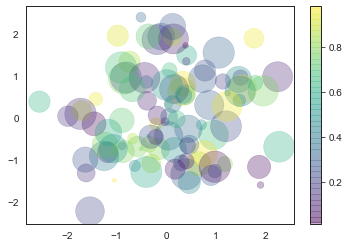

In [290]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

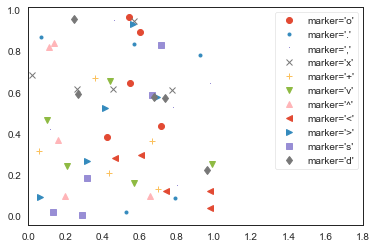

In [291]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Credits: https://seaborn.pydata.org/tutorial/categorical.html

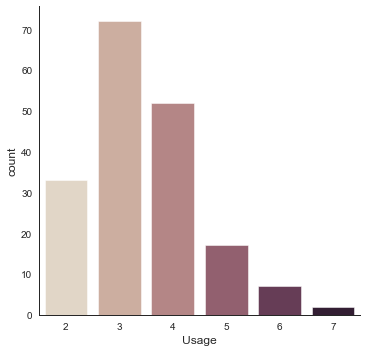

In [292]:
sns.catplot(x="Usage", kind="count", palette="ch:.25", data=df_new)

Creds: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

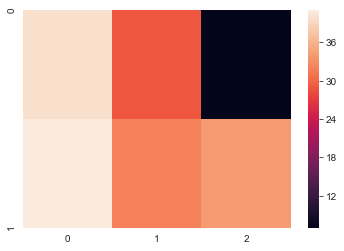

In [294]:
num_customers = []
f_customers = df_new[df_new['Gender'] == 'Female'].groupby(['Product', 'Gender'])['ID'].count()
m_customers = df_new[df_new['Gender'] == 'Male'].groupby(['Product', 'Gender'])['ID'].count()
num_customers.append(f_customers.tolist())
num_customers.append(m_customers.tolist())
num_customers = np.array(num_customers)
ax = sns.heatmap(num_customers)

plt.show()

Credits: https://python-graph-gallery.com/255-percentage-stacked-area-chart/

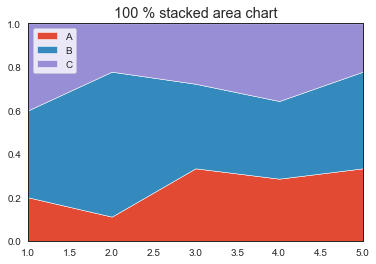

In [295]:
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


Text(0.5, 1.0, 'Matplotlib bakery: A donut')

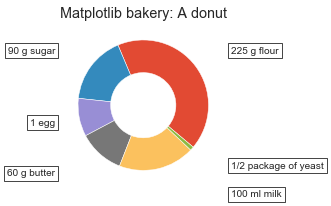

In [296]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")